In [5]:
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

In [ ]:
n_e = np.array([8.529762443780424e+17, 9.193382188674685e+17, 9.857001933568946e+17, 1.052062167846321e+18, 1.118424142335747e+18, 1.184786116825141e+18,  
  1.251148091314567e+18, 1.317510065803993e+18, 1.38387204029342e+18, 1.450234004086521e+18, 1.516595990708577e+18, 1.582957977330632e+18,  
  1.649319963952687e+18, 1.71568195057471e+18, 1.782043937196765e+18, 1.84840592381882e+18, 1.914767910440876e+18, 1.98112989706293e+18,  
  2.018896742135793e+18, 2.046349241852364e+18, 2.073801741568935e+18, 2.101254241285492e+18, 2.128706741002063e+18, 2.156159240718634e+18,  
  2.183611740435205e+18, 2.211064240151776e+18, 2.238453328502134e+18, 2.265287270392634e+18, 2.292121212283135e+18, 2.318955154173622e+18,  
  2.345789096064122e+18, 2.372623037954622e+18, 2.399456979845123e+18, 2.426290921735623e+18, 2.453124863626123e+18, 2.467738900323237e+18,  
  2.468577894053705e+18, 2.469416887784172e+18, 2.47025588151464e+18, 2.471094875245107e+18, 2.471933868975575e+18, 2.472772862706042e+18,  
  2.47361185643651e+18, 2.474450850166978e+18, 2.474587257751732e+18, 2.474587257751732e+18, 2.474587257751732e+18, 2.474587257751732e+18,  
  2.474587257751732e+18, 2.474587257751732e+18, 2.474587257751732e+18, 2.474587257751732e+18, 2.482030108938239e+18, 2.518336390648576e+18,  
  2.55464267235893e+18, 2.590948954069285e+18, 2.62725523577964e+18, 2.663561517489994e+18, 2.699867799200349e+18, 2.736174080910703e+18,  
  2.772480362621058e+18, 2.809809256450472e+18, 2.8479014611547e+18, 2.885993665858946e+18, 2.924085870563193e+18, 2.962178075267439e+18,  
  3.000270279971685e+18, 3.038362484675932e+18, 3.076454689380178e+18, 3.114546894084406e+18, 3.163144501034146e+18, 3.212413655672349e+18,  
  3.261682810310552e+18, 3.310951964948754e+18, 3.360221119586957e+18, 3.40949027422516e+18, 3.458759428863363e+18, 3.508028583501566e+18,  
  3.557526882160186e+18, 3.607541186475807e+18, 3.657555490791427e+18, 3.707569795107047e+18, 3.757584099422668e+18, 3.807598403738288e+18,  
  3.857612708053908e+18, 3.907627012369529e+18, 3.957641316685125e+18, 4.013150752241076e+18, 4.071304934437037e+18, 4.129459116632997e+18,  
  4.187613298828957e+18, 4.245767481024918e+18, 4.303921663220877e+18, 4.362075845416838e+18, 4.42023002761277e+18, 4.478413479537308e+18,  
  4.537257684788562e+18, 4.596101890039817e+18, 4.654946095291071e+18, 4.713790300542326e+18, 4.77263450579358e+18, 4.831478711044834e+18,  
  4.89032291629606e+18, 4.949167121547314e+18, 5.009416221885004e+18, 5.071686968714514e+18, 5.133957715544024e+18, 5.196228462373535e+18,  
  5.258499209203044e+18, 5.320769956032555e+18, 5.383040702862035e+18, 5.445311449691545e+18, 5.507582196521055e+18, 5.570128713843966e+18,  
  5.632754089331738e+18, 5.69537946481951e+18, 5.758004840307282e+18, 5.820630215795054e+18, 5.883255591282825e+18, 5.945880966770567e+18,  
  6.008506342258339e+18, 6.075059383629326e+18, 6.164787438740714e+18, 6.254515493852104e+18, 6.344243548963492e+18, 6.43397160407488e+18,  
  6.523699659186225e+18, 6.613427714297613e+18, 6.703155769409001e+18, 6.792883824520391e+18, 6.884317429069916e+18, 6.977373351087622e+18,  
  7.070429273105328e+18, 7.163485195123034e+18, 7.25654111714074e+18, 7.349597039158401e+18, 7.442652961176107e+18, 7.535708883193812e+18,  
  7.628764805211518e+18, 7.73172083679738e+18, 7.836025752300249e+18, 7.94033066780312e+18, 8.044635583305989e+18, 8.148940498808808e+18,  
  8.253245414311678e+18, 8.357550329814547e+18, 8.461855245317417e+18, 8.566557796284746e+18, 8.672469759387441e+18, 8.778381722490136e+18,  
  8.884293685592831e+18, 8.990205648695474e+18, 9.09611761179817e+18, 9.202029574900864e+18, 9.307941538003558e+18, 9.413853501106254e+18,  
  9.532172874322352e+18, 9.658259369316313e+18, 9.784345864310276e+18, 9.910432359304178e+18, 1.003651885429814e+19, 1.01626053492921e+19,  
  1.028869184428607e+19, 1.041477833928003e+19, 1.054086483427399e+19, 1.067019517999977e+19, 1.079958297953088e+19, 1.092897077906193e+19,  
  1.105835857859305e+19, 1.118774637812416e+19, 1.131713417765527e+19, 1.144652197718639e+19, 1.15759097767175e+19, 1.170644811472591e+19,  
  1.183912139784592e+19, 1.197179468096592e+19, 1.210446796408586e+19, 1.223714124720586e+19, 1.236981453032587e+19, 1.250248781344587e+19,  
  1.263516109656587e+19, 1.276783437968588e+19, 1.290094412872526e+19, 1.303422576613026e+19, 1.316750740353531e+19, 1.330078904094037e+19,  
  1.343407067834542e+19, 1.356735231575048e+19, 1.370063395315554e+19, 1.383391559056059e+19, 1.396909890923666e+19, 1.41247290434455e+19,  
  1.428035917765426e+19, 1.44359893118631e+19, 1.459161944607194e+19, 1.474724958028078e+19, 1.490287971448962e+19, 1.505850984869846e+19,  
  1.52141399829073e+19, 1.537186995761258e+19, 1.553213892973703e+19, 1.569240790186147e+19, 1.585267687398591e+19, 1.601294584611035e+19,  
  1.617321481823479e+19, 1.633348379035923e+19, 1.649375276248367e+19, 1.665402173460811e+19, 1.682195169346899e+19, 1.699156324290155e+19,  
  1.716117479233411e+19, 1.733078634176667e+19, 1.750039789119923e+19, 1.767000944063179e+19, 1.783962099006436e+19, 1.800923253949691e+19,  
  1.817924850835499e+19, 1.835101604214384e+19, 1.852278357593268e+19, 1.869455110972153e+19, 1.886631864351038e+19, 1.903808617729922e+19,  
  1.920985371108807e+19, 1.938162124487691e+19, 1.955338877866568e+19, 1.972050452713473e+19, 1.988389308936706e+19, 2.00472816515994e+19,  
  2.021067021383173e+19, 2.037405877606406e+19, 2.053744733829639e+19, 2.070083590052872e+19, 2.086422446276097e+19, 2.10276130249933e+19,  
  2.118903088719865e+19, 2.135028326552528e+19, 2.151153564385191e+19, 2.167278802217854e+19, 2.183404040050517e+19, 2.19952927788318e+19,  
  2.215654515715835e+19, 2.231779753548498e+19, 2.247286858955599e+19, 2.261281320799743e+19, 2.275275782643886e+19, 2.28927024448803e+19,  
  2.303264706332174e+19, 2.317259168176317e+19, 2.331253630020461e+19, 2.345248091864597e+19, 2.359242553708741e+19, 2.372844581460507e+19,  
  2.386242345240732e+19, 2.399640109020957e+19, 2.413037872801183e+19, 2.426435636581408e+19, 2.439833400361627e+19, 2.453231164141853e+19,  
  2.466628927922079e+19, 2.47995229731968e+19, 2.490375326494269e+19, 2.500798355668858e+19, 2.511221384843446e+19, 2.521644414018035e+19,  
  2.532067443192624e+19, 2.542490472367208e+19, 2.552913501541796e+19, 2.563336530716385e+19, 2.573402064466655e+19, 2.582914499390101e+19,  
  2.592426934313547e+19, 2.601939369236992e+19, 2.611451804160434e+19, 2.62096423908388e+19, 2.630476674007325e+19, 2.639989108930771e+19,  
  2.649501543854217e+19, 2.656740697116169e+19, 2.663262692554535e+19, 2.669784687992901e+19, 2.676306683431267e+19, 2.68282867886963e+19,  
  2.689350674307996e+19, 2.695872669746361e+19, 2.702394665184727e+19, 2.708789552799877e+19, 2.714314690994663e+19, 2.719839829189451e+19,  
  2.725364967384235e+19, 2.730890105579022e+19, 2.736415243773809e+19, 2.741940381968596e+19, 2.747465520163383e+19, 2.75299065835817e+19,  
  2.757455080084546e+19, 2.760837776161365e+19, 2.764220472238184e+19, 2.767603168315002e+19, 2.770985864391821e+19, 2.774368560468641e+19,  
  2.77775125654546e+19, 2.781133952622279e+19, 2.784516648699098e+19, 2.787230832026785e+19, 2.789838606167799e+19, 2.792446380308813e+19,  
  2.795054154449825e+19, 2.797661928590839e+19, 2.800269702731853e+19, 2.802877476872866e+19, 2.80548525101388e+19, 2.807931754901191e+19,  
  2.809838383803664e+19, 2.811745012706136e+19, 2.81365164160861e+19, 2.815558270511083e+19, 2.817464899413556e+19, 2.819371528316029e+19,  
  2.821278157218503e+19, 2.823184786120976e+19, 2.824927477181103e+19, 2.826559776421738e+19, 2.828192075662372e+19, 2.829824374903008e+19,  
  2.831456674143642e+19, 2.833088973384278e+19, 2.834721272624912e+19, 2.836353571865547e+19, 2.837985871106182e+19, 2.840524819234478e+19,  
  2.843096472314541e+19, 2.845668125394602e+19, 2.848239778474665e+19, 2.850811431554727e+19, 2.853383084634789e+19, 2.855954737714852e+19,  
  2.858526390794914e+19, 2.861229945564717e+19, 2.864198281017378e+19, 2.867166616470041e+19, 2.870134951922704e+19, 2.873103287375367e+19,  
  2.87607162282803e+19, 2.879039958280693e+19, 2.882008293733356e+19, 2.884976629186017e+19, 2.889578356368869e+19, 2.894879781421308e+19,  
  2.900181206473747e+19, 2.905482631526187e+19, 2.910784056578626e+19, 2.916085481631065e+19, 2.921386906683504e+19, 2.926688331735943e+19,  
  2.932061544006497e+19, 2.938423567495675e+19, 2.944785590984851e+19, 2.951147614474029e+19, 2.957509637963205e+19, 2.963871661452383e+19,  
  2.970233684941559e+19, 2.976595708430737e+19, 2.982957731919913e+19, 2.990672592014306e+19, 3.000144497486041e+19, 3.009616402957776e+19,  
  3.019088308429511e+19, 3.028560213901246e+19, 3.03803211937298e+19, 3.047504024844715e+19, 3.056975930316446e+19, 3.06644783578818e+19,  
  3.077138758315518e+19, 3.088129501512103e+19, 3.099120244708688e+19, 3.110110987905273e+19, 3.121101731101858e+19, 3.132092474298443e+19,  
  3.143083217495029e+19, 3.154073960691608e+19, 3.165567321874103e+19, 3.179511410660179e+19, 3.193455499446254e+19, 3.20739958823233e+19,  
  3.221343677018406e+19, 3.235287765804481e+19, 3.24923185459055e+19, 3.263175943376626e+19, 3.277120032162702e+19, 3.291895638754715e+19,  
  3.307386699214688e+19, 3.322877759674662e+19, 3.338368820134635e+19, 3.353859880594608e+19, 3.369350941054582e+19, 3.384842001514547e+19,  
  3.400333061974521e+19, 3.415824122434494e+19, 3.432922369016421e+19, 3.450189122237484e+19, 3.467455875458547e+19, 3.48472262867961e+19,  
  3.501989381900673e+19, 3.519256135121737e+19, 3.536522888342792e+19, 3.553789641563855e+19, 3.571328028716718e+19, 3.589590904752882e+19,  
  3.607853780789047e+19, 3.626116656825211e+19, 3.644379532861376e+19, 3.662642408897531e+19, 3.680905284933696e+19, 3.699168160969861e+19,  
  3.717431037006025e+19, 3.735667057356806e+19, 3.753887965820298e+19, 3.77210887428379e+19, 3.790329782747273e+19, 3.808550691210774e+19,  
  3.826771599674257e+19, 3.844992508137749e+19, 3.86321341660124e+19, 3.881434137156323e+19, 3.899629827545946e+19, 3.917825517935568e+19,  
  3.93602120832519e+19, 3.954216898714804e+19, 3.972412589104427e+19, 3.99060827949405e+19, 4.008803969883672e+19, 4.026999660273295e+19,  
  4.044570624938477e+19, 4.061101230084025e+19, 4.077631835229572e+19, 4.09416244037512e+19, 4.110693045520659e+19, 4.127223650666207e+19,  
  4.143754255811754e+19, 4.160284860957302e+19, 4.176815466102849e+19, 4.192553146003155e+19, 4.208016230238258e+19, 4.223479314473354e+19,  
  4.238942398708457e+19, 4.254405482943561e+19, 4.269868567178664e+19, 4.285331651413768e+19, 4.30079473564887e+19, 4.316048862473105e+19,  
  4.32961403631296e+19, 4.343179210152814e+19, 4.356744383992662e+19, 4.370309557832516e+19, 4.383874731672371e+19, 4.397439905512225e+19,  
  4.41100507935208e+19, 4.424570253191935e+19, 4.43751508892636e+19, 4.449781636302551e+19, 4.462048183678743e+19, 4.47431473105493e+19,  
  4.486581278431121e+19, 4.498847825807312e+19, 4.511114373183504e+19, 4.523380920559696e+19, 4.535647467935888e+19, 4.547980107905674e+19,  
  4.56032487191472e+19, 4.572669635923772e+19, 4.585014399932824e+19, 4.597359163941876e+19, 4.609703927950927e+19, 4.62204869195998e+19,  
  4.634393455969032e+19, 4.646750342668965e+19, 4.659152117901851e+19, 4.671553893134737e+19, 4.683955668367622e+19, 4.696357443600508e+19,  
  4.708759218833393e+19, 4.721160994066279e+19, 4.733562769299164e+19, 4.74596454453205e+19, 4.760885912168885e+19, 4.77763039776979e+19,  
  4.794374883370695e+19, 4.8111193689716e+19, 4.827863854572505e+19, 4.844608340173409e+19, 4.861352825774313e+19, 4.878097311375218e+19,  
  4.894841796976123e+19, 4.914787880919248e+19, 4.934910381626479e+19, 4.955032882333712e+19, 4.975155383040944e+19, 4.995277883748175e+19,  
  5.015400384455407e+19, 5.035522885162639e+19, 5.055645385869862e+19, 5.085816585780174e+19, 5.137829250571031e+19, 5.189841915361887e+19,  
  5.241854580152744e+19, 5.2938672449436e+19, 5.345879909734456e+19, 5.397892574525312e+19, 5.449905239316169e+19, 5.501917904107e+19,  
  5.571970892416779e+19, 5.650408921491608e+19, 5.728846950566439e+19, 5.807284979641268e+19, 5.885723008716098e+19, 5.964161037790927e+19,  
  6.042599066865719e+19, 6.121037095940587e+19, 6.200966283445289e+19, 6.309216731527891e+19, 6.417467179610495e+19, 6.525717627693097e+19,  
  6.6339680757757e+19, 6.742218523858303e+19, 6.850468971940906e+19, 6.958719420023456e+19, 7.066969868106059e+19, 7.186204677727737e+19,  
  7.320758380844974e+19, 7.45531208396221e+19, 7.589865787079447e+19, 7.724419490196683e+19, 7.858973193313855e+19, 7.993526896431091e+19,  
  8.128080599548328e+19, 8.262634302665564e+19, 8.365058069996913e+19, 8.458691831928807e+19, 8.552325593860701e+19, 8.645959355792595e+19,  
  8.73959311772449e+19, 8.833226879656339e+19, 8.926860641588234e+19, 9.020494403520129e+19, 9.108255174001146e+19, 9.163447681153363e+19,  
  9.21864018830558e+19, 9.273832695457795e+19, 9.329025202610012e+19, 9.384217709762229e+19, 9.439410216914418e+19, 9.494602724066635e+19,  
  9.54979523121885e+19, 9.639798045734537e+19, 9.761919913008351e+19, 9.884041780282163e+19, 1.000616364755598e+20, 1.012828551482973e+20,  
  1.025040738210354e+20, 1.037252924937736e+20, 1.049465111665117e+20, 1.061677298392498e+20, 1.079830744980146e+20, 1.098735858013583e+20,  
  1.117640971047021e+20, 1.136546084080459e+20, 1.155451197113887e+20, 1.174356310147325e+20, 1.193261423180763e+20, 1.212166536214201e+20,  
  1.229957200743513e+20, 1.244492241742164e+20, 1.259027282740815e+20, 1.27356232373946e+20, 1.288097364738111e+20, 1.302632405736762e+20,  
  1.317167446735414e+20, 1.331702487734065e+20, 1.346237528732716e+20, 1.357876283469015e+20, 1.367759441549322e+20, 1.377642599629638e+20,  
  1.387525757709945e+20, 1.397408915790261e+20, 1.407292073870567e+20, 1.417175231950879e+20, 1.42705839003119e+20, 1.436941548111501e+20,  
  1.443746718838902e+20, 1.450521403534883e+20, 1.457296088230871e+20, 1.464070772926852e+20, 1.470845457622837e+20, 1.477620142318821e+20,  
  1.484394827014806e+20, 1.49116951171079e+20, 1.496683685943621e+20, 1.499935215318665e+20, 1.503186744693706e+20, 1.506438274068748e+20,  
  1.50968980344379e+20, 1.512941332818833e+20, 1.516192862193875e+20, 1.519444391568917e+20, 1.522695920943959e+20, 1.525894382629024e+20,  
  1.529072726044509e+20, 1.532251069459992e+20, 1.535429412875477e+20, 1.538607756290962e+20, 1.541786099706447e+20, 1.544964443121932e+20,  
  1.548142786537417e+20, 1.551312940475765e+20, 1.554402939910281e+20, 1.557492939344798e+20, 1.560582938779315e+20, 1.563672938213831e+20,  
  1.566762937648349e+20, 1.569852937082866e+20, 1.572942936517382e+20, 1.576032935951899e+20, 1.579112781070851e+20, 1.58218071950334e+20,  
  1.585248657935831e+20, 1.588316596368322e+20, 1.591384534800813e+20, 1.594452473233303e+20, 1.597520411665794e+20, 1.600588350098285e+20,  
  1.603656288530774e+20, 1.606700758600731e+20, 1.60974033968203e+20, 1.612779920763331e+20, 1.615819501844632e+20, 1.618859082925933e+20,  
  1.621898664007234e+20, 1.624938245088533e+20, 1.627977826169835e+20, 1.630994678812626e+20, 1.633917813185211e+20, 1.636840947557795e+20,  
  1.639764081930379e+20, 1.642687216302963e+20, 1.645610350675548e+20, 1.648533485048132e+20, 1.651456619420714e+20, 1.6543797537933e+20,  
  1.657213061631425e+20, 1.659976584313019e+20, 1.662740106994612e+20, 1.665503629676206e+20, 1.668267152357799e+20, 1.671030675039393e+20,  
  1.673794197720986e+20, 1.676557720402578e+20, 1.679321243084172e+20, 1.682035239283957e+20, 1.68474551266556e+20, 1.687455786047163e+20,  
  1.690166059428765e+20, 1.692876332810368e+20, 1.695586606191971e+20, 1.698296879573573e+20, 1.701007152955174e+20, 1.703694251298625e+20,  
  1.706326676070448e+20, 1.708959100842271e+20, 1.711591525614094e+20, 1.714223950385917e+20, 1.71685637515774e+20, 1.719488799929562e+20,  
  1.722121224701385e+20, 1.724753649473208e+20, 1.727314546341494e+20, 1.729839455960791e+20, 1.732364365580088e+20, 1.734889275199384e+20,  
  1.73741418481868e+20, 1.739939094437976e+20, 1.742464004057273e+20, 1.74498891367657e+20, 1.74750835235093e+20, 1.749865474181413e+20,  
  1.752222596011897e+20, 1.754579717842381e+20, 1.756936839672864e+20, 1.759293961503347e+20, 1.761651083333832e+20, 1.764008205164314e+20,  
  1.766365326994798e+20, 1.768677519533995e+20, 1.77092237232436e+20, 1.773167225114724e+20, 1.775412077905088e+20, 1.777656930695454e+20,  
  1.779901783485817e+20, 1.782146636276182e+20, 1.784391489066547e+20, 1.786636341856911e+20, 1.78873747818565e+20, 1.790795147804659e+20,  
  1.792852817423668e+20, 1.794910487042676e+20, 1.796968156661685e+20, 1.799025826280693e+20, 1.801083495899702e+20, 1.80314116551871e+20,  
  1.805172178044104e+20, 1.807032928461377e+20, 1.80889367887865e+20, 1.810754429295924e+20, 1.812615179713196e+20, 1.81447593013047e+20,  
  1.816336680547743e+20, 1.818197430965016e+20, 1.82005818138229e+20, 1.821742486921741e+20, 1.82325224070458e+20, 1.824761994487419e+20,  
  1.826271748270259e+20, 1.827781502053097e+20, 1.829291255835937e+20, 1.830801009618777e+20, 1.832310763401616e+20, 1.833820517184455e+20,  
  1.835330249865228e+20, 1.836839978735736e+20, 1.838349707606243e+20, 1.839859436476751e+20, 1.841369165347258e+20, 1.842878894217766e+20,  
  1.844388623088274e+20, 1.845898351958782e+20, 1.847408086862865e+20, 1.848917840645704e+20, 1.850427594428544e+20, 1.851937348211383e+20,  
  1.853447101994222e+20, 1.854956855777061e+20, 1.856466609559901e+20, 1.85797636334274e+20, 1.85948611712558e+20, 1.860995859151512e+20,  
  1.862505592551533e+20, 1.864015325951557e+20, 1.865525059351579e+20, 1.867034792751601e+20, 1.868544526151624e+20, 1.870054259551647e+20,  
  1.871563992951669e+20, 1.873073726351691e+20, 1.874583500017664e+20, 1.876093274183319e+20, 1.877603048348975e+20, 1.879112822514632e+20,  
  1.880622596680288e+20, 1.882132370845944e+20, 1.8836421450116e+20, 1.885151919177256e+20, 1.886661685411161e+20, 1.888171434664486e+20,  
  1.88968118391781e+20, 1.891190933171134e+20, 1.892700682424459e+20, 1.894210431677784e+20, 1.895720180931108e+20, 1.897229930184433e+20,  
  1.898739679437757e+20, 1.900249417549523e+20, 1.901759150949546e+20, 1.903268884349569e+20, 1.904778617749591e+20, 1.906288351149614e+20,  
  1.907798084549637e+20, 1.909307817949659e+20, 1.910817551349681e+20, 1.912327286552995e+20, 1.91383703580632e+20, 1.915346785059644e+20,  
  1.916856534312969e+20, 1.918366283566294e+20, 1.919876032819618e+20, 1.921385782072943e+20, 1.922895531326267e+20, 1.924405280579592e+20,  
  1.925915031915542e+20, 1.927424785698381e+20, 1.928934539481221e+20, 1.930444293264061e+20, 1.9319540470469e+20, 1.933463800829739e+20,  
  1.934973554612578e+20, 1.936483308395418e+20, 1.937993062178257e+20, 1.939446348104724e+20, 1.940886404948579e+20, 1.942326461792435e+20,  
  1.943766518636291e+20, 1.945206575480147e+20, 1.946646632324002e+20, 1.948086689167857e+20, 1.949526746011714e+20, 1.95093514077432e+20,  
  1.952197103646303e+20, 1.953459066518286e+20, 1.954721029390269e+20, 1.955982992262252e+20, 1.957244955134235e+20, 1.958506918006218e+20,  
  1.959768880878201e+20, 1.961030843750184e+20, 1.962212721313901e+20, 1.963327838770701e+20, 1.9644429562275e+20, 1.965558073684299e+20,  
  1.966673191141098e+20, 1.967788308597897e+20, 1.968903426054697e+20, 1.970018543511496e+20, 1.971133660968295e+20, 1.971878257644519e+20,  
  1.972587413774916e+20, 1.973296569905314e+20, 1.974005726035711e+20, 1.974714882166109e+20, 1.975424038296506e+20, 1.976133194426903e+20,  
  1.9768423505573e+20, 1.977551500825477e+20, 1.978260635683332e+20, 1.978969770541186e+20, 1.979678905399041e+20, 1.980388040256895e+20,  
  1.981097175114749e+20, 1.981806309972604e+20, 1.982515444830458e+20, 1.983224579688313e+20, 1.983933714992637e+20, 1.984642850740218e+20,  
  1.985351986487798e+20, 1.986061122235379e+20, 1.986770257982959e+20, 1.98747939373054e+20, 1.98818852947812e+20, 1.988897665225701e+20,  
  1.989606801104521e+20, 1.990315936852102e+20, 1.991025072599683e+20, 1.991734208347263e+20, 1.992443344094844e+20, 1.993152479842424e+20,  
  1.993861615590004e+20, 1.994570751337585e+20, 1.995279887085166e+20, 1.995989030766286e+20, 1.996698186896683e+20, 1.997407343027081e+20,  
  1.998116499157478e+20, 1.998825655287876e+20, 1.999534811418272e+20, 2.00024396754867e+20, 2.000953123679067e+20, 2.001662279809465e+20,  
  2.002370487279857e+20, 2.00307837902854e+20, 2.003786270777224e+20, 2.004494162525907e+20, 2.005202054274591e+20, 2.005909946023274e+20,  
  2.006617837771958e+20, 2.007325729520641e+20, 2.008033093657652e+20, 2.008736502885213e+20, 2.009439912112773e+20, 2.010143321340334e+20,  
  2.010846730567894e+20, 2.011550139795454e+20, 2.012253549023015e+20, 2.012956958250575e+20, 2.013660367478136e+20, 2.014328836442782e+20,  
  2.014960247252515e+20, 2.015591658062248e+20, 2.016223068871981e+20, 2.016854479681714e+20, 2.017485890491447e+20, 2.01811730130118e+20,  
  2.018748712110913e+20, 2.019380122920646e+20, 2.019770567043102e+20, 2.020119357399388e+20, 2.020468147755674e+20, 2.02081693811196e+20,  
  2.021165728468247e+20, 2.021514518824532e+20, 2.021863309180819e+20, 2.022212099537105e+20, 2.022560890030419e+20, 2.022909680386705e+20,  
  2.023258470742991e+20, 2.023607261099277e+20, 2.023956051455563e+20, 2.024304841811849e+20, 2.024653632168135e+20, 2.025002422524421e+20,  
  2.025351212880707e+20, 2.025700015354834e+20, 2.026048826093937e+20, 2.02639763683304e+20, 2.026746447572143e+20, 2.027095258311246e+20,  
  2.027444069050349e+20, 2.027792879789452e+20, 2.028141690528555e+20, 2.028490501267658e+20, 2.028839302105656e+20, 2.029188102370256e+20,  
  2.029536902634855e+20, 2.029885702899455e+20, 2.030234503164055e+20, 2.030583303428655e+20, 2.030932103693255e+20, 2.031280903957854e+20,  
  2.031629707692492e+20, 2.031978518431595e+20, 2.032327329170697e+20, 2.0326761399098e+20, 2.033024950648903e+20, 2.033373761388006e+20,  
  2.033722572127109e+20, 2.034071382866212e+20, 2.034420193605315e+20, 2.034768990380338e+20, 2.035117780736624e+20, 2.03546657109291e+20,  
  2.035815361449197e+20, 2.036164151805483e+20, 2.036512942161769e+20, 2.036861732518055e+20, 2.037210522874341e+20, 2.037559313941123e+20,  
  2.037908114205723e+20, 2.038256914470323e+20, 2.038605714734922e+20, 2.038954514999522e+20, 2.039303315264122e+20, 2.039652115528722e+20,  
  2.040000915793321e+20, 2.040349716057921e+20, 2.040698520866205e+20, 2.041047331605307e+20, 2.04139614234441e+20, 2.041744953083513e+20,  
  2.042093763822616e+20, 2.042442574561719e+20, 2.042791385300822e+20, 2.043140196039925e+20, 2.043489006779028e+20, 2.043837801464795e+20,  
  2.04418659182108e+20, 2.044535382177367e+20, 2.044884172533653e+20, 2.045232962889939e+20, 2.045581753246225e+20, 2.045930543602511e+20,  
  2.046279333958797e+20, 2.046628129310152e+20, 2.046976949957568e+20, 2.047325770604985e+20, 2.047674591252401e+20, 2.048023411899818e+20,  
  2.048372232547235e+20, 2.048721053194651e+20, 2.049069873842068e+20, 2.049418694489484e+20, 2.049767499205648e+20, 2.050116289561934e+20,  
  2.05046507991822e+20, 2.050813870274506e+20, 2.051162660630792e+20, 2.051511450987078e+20, 2.051860241343364e+20, 2.052209031699651e+20,  
  2.052557822055937e+20, 2.052906630797833e+20, 2.053255441536936e+20, 2.053604252276039e+20, 2.053953063015142e+20, 2.054301873754245e+20,  
  2.054650684493348e+20, 2.05499949523245e+20, 2.055348305971554e+20, 2.055697108704899e+20, 2.056045888586682e+20, 2.056394668468465e+20,  
  2.056743448350248e+20, 2.057092228232031e+20, 2.057441008113814e+20, 2.057789787995597e+20, 2.05813856787738e+20])
t_e = np.array([9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.347212653224828, 9.350140156192644, 9.353067659160459, 9.355995162128275, 9.35892266509609,  
  9.361850168063905, 9.364777671031721, 9.367705173999537, 9.370632676967352, 9.373744419774576, 9.377031411646044,  
  9.380318403517512, 9.383605395388978, 9.386892387260446, 9.390179379131911, 9.393466371003379, 9.396753362874847,  
  9.400040354746315, 9.423241867022737, 9.449156654005344, 9.475071440987952, 9.500986227970557, 9.526901014953152,  
  9.552815801935759, 9.578730588918367, 9.604645375900974, 9.631360010346729, 9.66050755105182, 9.689655091756912,  
  9.718802632462003, 9.747950173167078, 9.77709771387217, 9.806245254577261, 9.835392795282351, 9.864540335987442,  
  9.911013826875648, 9.96833340515732, 10.025652983439, 10.08297256172064, 10.14029214000231, 10.19761171828399,  
  10.25493129656566, 10.31225087484734, 10.36957045312901, 10.43141983363, 10.49334946537373, 10.55527909711743,  
  10.61720872886117, 10.6791383606049, 10.74106799234864, 10.80299762409237, 10.8649272558361, 10.9280794507282,  
  10.99350036753459, 11.05892128434098, 11.12434220114734, 11.18976311795374, 11.25518403476013, 11.32060495156652,  
  11.38602586837291, 11.45144678517931, 11.51733170950935, 11.58339932999997, 11.64946695049062, 11.71553457098127,  
  11.78160219147193, 11.84766981196258, 11.91373743245323, 11.97980505294389, 12.04677858703051, 12.1234925549091,  
  12.20020652278765, 12.27692049066625, 12.35363445854484, 12.43034842642343, 12.50706239430202, 12.58377636218062,  
  12.66049033005921, 12.73820468039991, 12.81712855770173, 12.89605243500354, 12.97497631230535, 13.05390018960716,  
  13.13282406690898, 13.21174794421079, 13.2906718215126, 13.36959569881442, 13.45010905191273, 13.53097127935537,  
  13.61183350679801, 13.69269573424065, 13.77355796168329, 13.85442018912593, 13.93528241656857, 14.01614464401121,  
  14.09709083467256, 14.17840049510975, 14.25971015554695, 14.34101981598414, 14.42232947642134, 14.50363913685853,  
  14.58494879729573, 14.66625845773292, 14.74756811817008, 14.82517751673723, 14.89982223768128, 14.97446695862534,  
  15.0491116795694, 15.12375640051345, 15.19840112145751, 15.27304584240157, 15.34769056334559, 15.42233528428964,  
  15.49541247986602, 15.56835800496236, 15.64130353005869, 15.71424905515503, 15.78719458025136, 15.8601401053477,  
  15.933085630444, 16.00603115554033, 16.07551977427251, 16.13654891352759, 16.19757805278267, 16.25860719203774,  
  16.31963633129282, 16.3806654705479, 16.44169460980298, 16.50272374905802, 16.5637528883131, 16.62258721207742,  
  16.68027912852677, 16.73797104497612, 16.79566296142548, 16.85335487787483, 16.91104679432415, 16.9687387107735,  
  17.02643062722286, 17.08375453046959, 17.12673078985805, 17.16970704924651, 17.21268330863496, 17.25565956802343,  
  17.29863582741188, 17.34161208680032, 17.38458834618877, 17.42756460557723, 17.46877232733799, 17.50724381966334,  
  17.54571531198868, 17.58418680431403, 17.62265829663936, 17.6611297889647, 17.69960128129005, 17.7380727736154,  
  17.77654426594074, 17.80092314529675, 17.82085616874545, 17.84078919219414, 17.86072221564283, 17.88065523909152,  
  17.90058826254021, 17.92052128598891, 17.9404543094376, 17.95959934725461, 17.97335250194383, 17.98710565663304,  
  18.00085881132224, 18.01461196601145, 18.02836512070067, 18.04211827538988, 18.05587143007909, 18.0696245847683,  
  18.07837729916319, 18.08203051884663, 18.08568373853007, 18.0893369582135, 18.09299017789694, 18.09664339758038,  
  18.10029661726382, 18.10394983694725, 18.10760305663069, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10951004673027, 18.11151739537344,  
  18.11352474401661, 18.11553209265977, 18.11753944130294, 18.11954678994611, 18.12155413858927, 18.12356148723244,  
  18.12563059368017, 18.12855038608108, 18.13147017848199, 18.1343899708829, 18.13730976328381, 18.14022955568472,  
  18.14314934808563, 18.14606914048654, 18.14898893288745, 18.15631389308621, 18.16936022227758, 18.18240655146894,  
  18.19545288066031, 18.20849920985167, 18.22154553904304, 18.2345918682344, 18.24763819742576, 18.26068452661713,  
  18.27770034257914, 18.29569246046, 18.31368457834086, 18.33167669622172, 18.34966881410258, 18.36766093198344,  
  18.3856530498643, 18.40364516774515, 18.4237275130591, 18.45400166208035, 18.48427581110161, 18.51454996012287,  
  18.54482410914412, 18.57509825816538, 18.60537240718662, 18.63564655620788, 18.66592070522913, 18.69965293809202,  
  18.73636057191836, 18.7730682057447, 18.80977583957105, 18.84648347339739, 18.88319110722373, 18.91989874105006,  
  18.9566063748764, 18.99331400870274, 19.04014680201181, 19.08804123236061, 19.13593566270941, 19.18383009305821,  
  19.23172452340701, 19.2796189537558, 19.32751338410458, 19.37540781445338, 19.42501346399983, 19.47918329345852,  
  19.53335312291721, 19.58752295237589, 19.64169278183457, 19.69586261129323, 19.75003244075192, 19.8042022702106,  
  19.85837209966929, 19.91721804523195, 19.97869416848411, 20.04017029173627, 20.10164641498841, 20.1631225382406,  
  20.22459866149273, 20.28607478474489, 20.34755090799705, 20.40906038126048, 20.47492041759264, 20.54078045392481,  
  20.60664049025697, 20.6725005265891, 20.73836056292127, 20.80422059925343, 20.8700806355856, 20.93594067191776,  
  21.00267104200966, 21.07085085183351, 21.13903066165737, 21.20721047148122, 21.27539028130504, 21.3435700911289,  
  21.41174990095275, 21.4799297107766, 21.54810952060046, 21.61739408645278, 21.6870612424899, 21.75672839852699,  
  21.82639555456411, 21.89606271060124, 21.96572986663836, 22.03539702267548, 22.1050641787126, 22.17468612670773,  
  22.24394285696365, 22.31319958721957, 22.38245631747546, 22.45171304773139, 22.52096977798731, 22.59022650824324,  
  22.65948323849916, 22.72873996875508, 22.79786260371155, 22.8668386403928, 22.93581467707405, 23.00479071375526,  
  23.07376675043651, 23.14274278711775, 23.211718823799, 23.28069486048025, 23.3496708971615, 23.42113413886375,  
  23.49305355741354, 23.56497297596337, 23.6368923945132, 23.70881181306302, 23.78073123161285, 23.85265065016268,  
  23.92457006871251, 23.99694615260105, 24.07101344876736, 24.14508074493368, 24.2191480411, 24.29321533726632,  
  24.36728263343263, 24.44134992959895, 24.51541722576527, 24.58948452193159, 24.67247872058766, 24.76193222698194,  
  24.85138573337622, 24.9408392397705, 25.03029274616478, 25.11974625255905, 25.20919975895334, 25.29865326534761,  
  25.38810677174189, 25.48890379855529, 25.59032587973114, 25.69174796090699, 25.79317004208285, 25.8945921232587,  
  25.99601420443455, 26.0974362856104, 26.1988583667862, 26.31235751124369, 26.45210697760374, 26.59185644396379,  
  26.73160591032384, 26.87135537668388, 27.01110484304393, 27.15085430940398, 27.29060377576403, 27.43035324212401,  
  27.59178461285641, 27.7632936346416, 27.93480265642679, 28.10631167821198, 28.27782069999716, 28.44932972178236,  
  28.62083874356746, 28.79234776535273, 28.96553254739833, 29.17054392232008, 29.37555529724183, 29.58056667216358,  
  29.78557804708533, 29.99058942200708, 30.19560079692883, 30.40061217185048, 30.60562354677223, 30.82297882433413,  
  31.05754893745657, 31.29211905057901, 31.52668916370146, 31.7612592768239, 31.99582938994622, 32.23039950306867,  
  32.46496961619111, 32.69953972931355, 32.97598326529322, 33.26388235136999, 33.55178143744675, 33.83968052352351,  
  34.12757960960027, 34.4154786956769, 34.70337778175365, 34.99127686783041, 35.28682970081722, 35.62482654955463,  
  35.96282339829202, 36.30082024702943, 36.63881709576683, 36.97681394450423, 37.31481079324147, 37.65280764197887,  
  37.99080449071627, 38.36933326604687, 38.78526030456003, 39.2011873430732, 39.61711438158637, 40.03304142009933,  
  40.4489684586125, 40.86489549712567, 41.28082253563883, 41.696749574152, 42.1818551842202, 42.67571305794299,  
  43.16957093166579, 43.66342880538859, 44.15728667911115, 44.65114455283394, 45.14500242655674, 45.63886030027953,  
  46.13603108108936, 46.64287985473967, 47.14972862838998, 47.65657740204004, 48.16342617569035, 48.67027494934065,  
  49.17712372299096, 49.68397249664127, 50.19082127029158, 50.7062805347722, 51.22695910399799, 51.74763767322428,  
  52.26831624245008, 52.78899481167637, 53.30967338090216, 53.83035195012821, 54.35103051935425, 54.8717090885803,  
  55.40508227164378, 55.93858095338439, 56.4720796351255, 57.00557831686611, 57.53907699860697, 58.07257568034782,  
  58.60607436208868, 59.13957304382954, 59.6782698866801, 60.22629778980603, 60.77432569293143, 61.3223535960571,  
  61.87038149918277, 62.41840940230843, 62.9664373054341, 63.51446520855977, 64.06249311168544, 64.58928012665066,  
  65.10801436845706, 65.62674861026321, 66.14548285206961, 66.66421709387599, 67.18295133568239, 67.70168557748879,  
  68.22041981929519, 68.73587652123688, 69.21925400826139, 69.70263149528613, 70.18600898231088, 70.66938646933562,  
  71.15276395636037, 71.63614144338513, 72.11951893040987, 72.60289641743462, 73.08578069309385, 73.56808664765593,  
  74.05039260221825, 74.53269855678057, 75.01500451134289, 75.49731046590522, 75.97961642046752, 76.46192237502984,  
  76.94422832959194, 77.42539581845526, 77.90632604476892, 78.3872562710828, 78.86818649739669, 79.34911672371058,  
  79.83004695002447, 80.31097717633811, 80.79190740265224, 81.27173143530601, 81.74699469617553, 82.22225795704504,  
  82.69752121791457, 83.17278447878408, 83.64804773965361, 84.12331100052313, 84.59857426139241, 85.07383752226217,  
  85.54473112750088, 86.01223021186782, 86.47972929623474, 86.94722838060167, 87.41472746496859, 87.88222654933553,  
  88.34972563370246, 88.81722471806916, 89.28472380243609, 89.75188913834614, 90.21902930536041, 90.68616947237466,  
  91.15330963938891, 91.62044980640317, 92.08758997341742, 92.55473014043169, 93.02187030744571, 93.48885394282033,  
  93.95546824961005, 94.42208255639979, 94.88869686318951, 95.35531116997923, 95.82192547676897, 96.28853978355846,  
  96.75515409034819, 97.22176839713792, 97.68790062828118, 98.15379036540351, 98.61968010252585, 99.08556983964817,  
  99.55145957677027, 100.0173493138926, 100.4832390510149, 100.9491287881373, 101.4149815250977, 101.8797389467251,  
  102.3444963683524, 102.8092537899798, 103.2740112116072, 103.7387686332344, 104.203526054862, 104.6682834764891,  
  105.1330408981165, 105.5977693212496, 106.0624542578479, 106.5271391944462, 106.9918241310443, 107.4565090676429,  
  107.9211940042409, 108.3858789408392, 108.8505638774375, 109.3152488140358, 109.7798388753783, 110.2444000851113,  
  110.7089612948442, 111.173522504577, 111.6380837143101, 112.1026449240428, 112.5672061337758, 113.0317673435087,  
  113.4963112970836, 113.9607445425376, 114.4251777879915, 114.8896110334455, 115.3540442788992, 115.8184775243532,  
  116.2829107698071, 116.7473440152611, 117.2117772607151, 117.6760949979625, 118.1402982725248, 118.604501547087,  
  119.0687048216492, 119.5329080962112, 119.9971113707735, 120.4613146453357, 120.925517919898, 121.3897211944602,  
  121.8539246458277, 122.3181281168263, 122.7823315878247, 123.2465350588234, 123.710738529822, 124.1749420008206,  
  124.6391454718192, 125.1033489428179, 125.5675523896747, 126.0317556642367, 126.4959589387991, 126.9601622133611,  
  127.4243654879234, 127.8885687624856, 128.3527720370479, 128.8169753116101, 129.2811785861723, 129.7453845329579,  
  130.2095922133076, 130.6737998936577, 131.1380075740074, 131.6022152543573, 132.0664229347072, 132.5306306150571,  
  132.994838295407, 133.4590459757567, 133.9232572159747, 134.3874684321795, 134.8516796483845, 135.3158908645895,  
  135.7801020807945, 136.2443132969995, 136.7085245132045, 137.1727357294095, 137.6369459333817, 138.1011538382306,  
  138.565361743079, 139.0295696479276, 139.4937775527763, 139.9579854576249, 140.4221933624736, 140.8864012673222,  
  141.3506091721709, 141.8148143292121, 142.2790185017693, 142.7432226743265, 143.2074268468837, 143.6716310194408,  
  144.135835191998, 144.6000393645552, 145.0642435371122, 145.5284476078391, 145.9926519768327, 146.4568563458262,  
  146.9210607148198, 147.3852650838134, 147.8494694528069, 148.3136738218005, 148.7778781907941, 149.2420825597874,  
  149.70628595916, 150.1704883637896, 150.6346907684193, 151.0988931730489, 151.5630955776786, 152.0272979823082,  
  152.4915003869376, 152.9557027915675, 153.4199051961969, 153.8841060545253, 154.3483066912274, 154.8125073279295,  
  155.2767079646316, 155.7409086013337, 156.2051092380358, 156.6693098747377, 157.13351051144, 157.5977097796535,  
  158.0619033446454, 158.5260969096373, 158.9902904746293, 159.4544840396212, 159.918677604613, 160.3828711696051,  
  160.8470647345968, 161.3112582995888, 161.775447050345, 162.2396319721357, 162.7038168939263, 163.168001815717,  
  163.6321867375076, 164.096371659298, 164.5605565810889, 165.0247415028793, 165.48892642467, 165.9530965793649,  
  166.4172653933713, 166.8814342073777, 167.3456030213841, 167.8097718353905, 168.2739406493967, 168.7381094634031,  
  169.2022782774095, 169.66644658817, 170.1306138306853, 170.5947810732006, 171.0589483157158, 171.5231155582308,  
  171.9872828007461, 172.4514500432614, 172.9156172857766, 173.3797845282919, 173.8439516095842, 174.3081186556631,  
  174.772285701742, 175.2364527478208, 175.7006197938994, 176.1647868399783, 176.6289538860572, 177.0931209321361,  
  177.5572878912551, 178.0214531694064, 178.4856184475578, 178.9497837257089, 179.4139490038604, 179.8781142820115,  
  180.3422795601629, 180.8064448383142, 181.2706101164655, 181.7347760139657, 182.1989430600444, 182.6631101061235,  
  183.1272771522021, 183.5914441982812, 184.0556112443598, 184.5197782904387, 184.9839453365176, 185.4481123825964,  
  185.9122795159914, 186.3764467585064, 186.8406140010219, 187.3047812435369, 187.7689484860522, 188.2331157285674,  
  188.6972829710827, 189.161450213598, 189.6256173989844, 190.0897844450633, 190.5539514911419, 191.0181185372208,  
  191.4822855832996, 191.9464526293785, 192.4106196754574, 192.8747867215362, 193.3389537676151, 193.8031208489375,  
  194.2672880914528, 194.7314553339678, 195.1956225764831, 195.6597898189983, 196.1239570615136, 196.5881243040288,  
  197.0522915465441, 197.5164587890594, 197.9806243227176, 198.444789600869, 198.9089548790203, 199.3731201571716,  
  199.8372854353229, 200.3014507134743, 200.7656159916256, 201.2297812697769, 201.6939468798387, 202.1581139259173,  
  202.6222809719964, 203.0864480180751, 203.5506150641539, 204.0147821102328, 204.4789491563117, 204.9431162023905,  
  205.4072832484692, 205.871453351973, 206.3356257018343, 206.7997980516958, 207.2639704015573, 207.7281427514187,  
  208.1923151012802, 208.6564874511415, 209.1206598010032, 209.5848321508644, 210.0490029311991, 210.5131737095693,  
  210.9773444879396, 211.4415152663099, 211.9056860446803, 212.3698568230506, 212.834027601421, 213.2981983797913,  
  213.7623684839445, 214.2265372979509, 214.6907061119573, 215.1548749259637, 215.6190437399701, 216.0832125539765,  
  216.5473813679829, 217.0115501819891, 217.4757189959955, 217.939886526841, 218.4040535729198, 218.8682206189987,  
  219.3323876650775, 219.7965547111564, 220.2607217572353, 220.7248888033141, 221.1890558493928, 221.6532227444329,  
  222.1173882190206, 222.5815536936083, 223.0457191681961, 223.5098846427838, 223.9740501173715, 224.438215591959,  
  224.9023810665467, 225.3665465411345, 225.8307119013391, 226.2948771794904, 226.7590424576418, 227.2232077357931,  
  227.6873730139442, 228.1515382920958, 228.6157035702469, 229.0798688483984, 229.5440341265495, 230.0082007489062,  
  230.4723677949851, 230.9365348410639, 231.4007018871428, 231.8648689332214, 232.3290359793005, 232.7932030253792,  
  233.257370071458, 233.7215368054189, 234.1857022800067, 234.6498677545944, 235.1140332291819, 235.5781987037698,  
  236.0423641783573, 236.506529652945, 236.9706951275328, 237.4348606021205, 237.8990268751358, 238.3631939212147,  
  238.8273609672935, 239.2915280133724, 239.7556950594513, 240.2198621055299, 240.6840291516088, 241.1481961976876,  
  241.6123632437665, 242.0765286469483, 242.5406939250996, 243.0048592032509, 243.469024481402, 243.9331897595534,  
  244.3973550377047, 244.861520315856, 245.3256855940074, 245.7898513311563, 246.2540185736716, 246.7181858161869,  
  247.1823530587021, 247.6465203012172, 248.1106875437324, 248.5748547862477, 249.0390220287629])
        

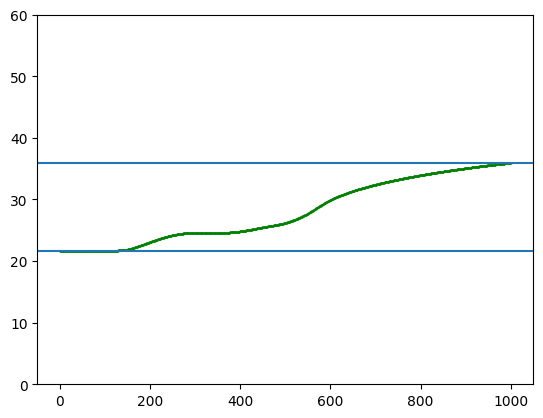

In [258]:
t_init = 10 * (np.log10(t_e) + 1.2)
plt.scatter(range(len(t_e)),t_init,marker='.',s=2**0.5,color='g')
plt.ylim(0,60)
plt.axhline(max(t_init))
plt.axhline(min(t_init))

(array([203.,  87., 198.,  55.,  32.,  35.,  55.,  77., 108., 151.]),
 array([21.70662411, 23.1322291 , 24.55783409, 25.98343908, 27.40904408,
        28.83464907, 30.26025406, 31.68585905, 33.11146404, 34.53706903,
        35.96267402]),
 <BarContainer object of 10 artists>)

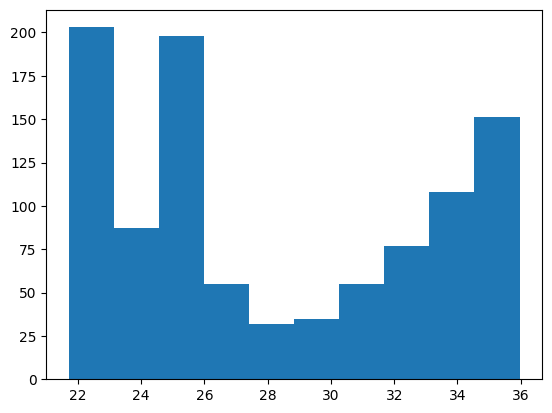

In [220]:
plt.hist(t_init)

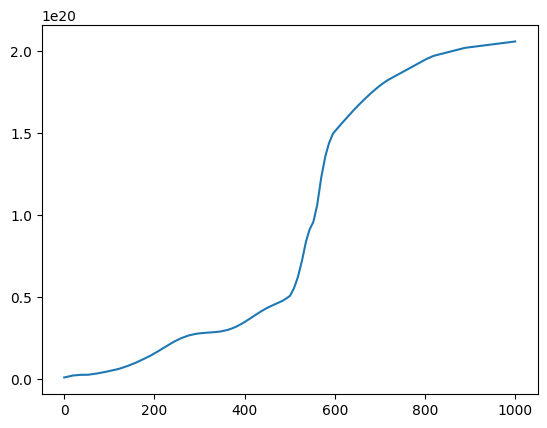

In [18]:
plt.plot(n_e)

In [22]:
# plt.plot(t_e)

In [10]:
n_e.shape, t_e.shape

((1001,), (1001,))

In [184]:
temp = np.float64(t_e)  # o simplemente float(t_e)
dens = np.float64(n_e)  # o simplemente float(n_e)

dens = dens/(1e6)
indne = 2*(np.log10(dens) - 10)
# print(indne)
indne = np.clip(indne, 0, 14)
# print(indne)
print(indne.max(),indne.min())
indte = 10 * (np.log10(temp) + 1.2)
indte = np.clip(indte, 0, 59)
print(indte.max(),indte.min())

8.626949222134296 3.8618738722314276
35.96267402212101 21.7066241119457


In [186]:
print(indte.shape)

(1001,)


In [188]:
indte,indne

(array([21.70662411, 21.70662411, 21.70662411, ..., 35.94645472,
        35.95457194, 35.96267402]),
 array([3.86187387, 3.92695063, 3.98748968, ..., 8.62665478, 8.62680202,
        8.62694922]))

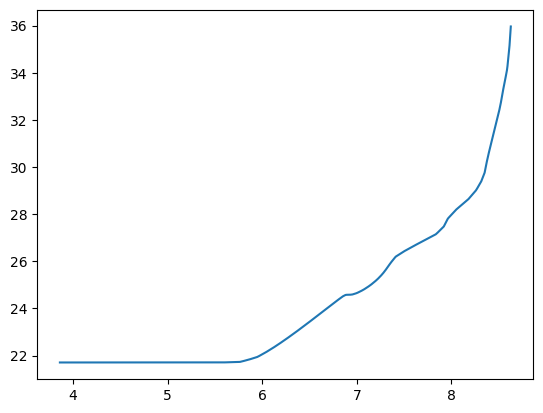

In [190]:
plt.plot(indne,indte)

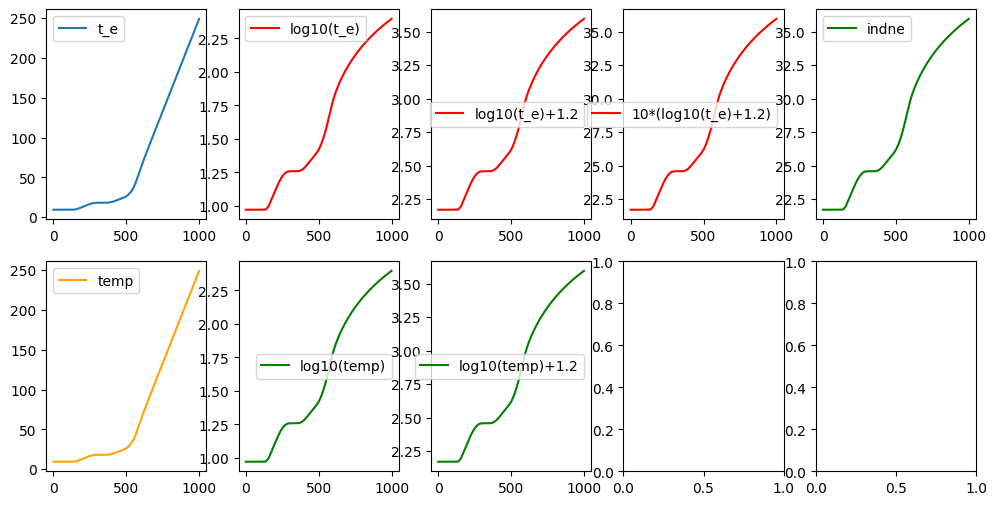

In [95]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Primer subplot
ax[0][0].plot(t_e, label='t_e')
# ax[0][0].axhline(2e20)
ax[0][0].legend()

# Segundo subplot
ax[1][0].plot(temp, label='temp', color='orange')
# ax[1][0].axhline(2e14)
ax[1][0].legend()

ax[0][1].plot(np.log10(t_e), label='log10(t_e)', color='red')
# ax[0][1].axhline(20)
ax[0][1].legend()

ax[1][1].plot(np.log10(temp), label='log10(temp)', color='g')
# ax[1][1].axhline(14)
ax[1][1].legend()

ax[0][2].plot(np.log10(t_e)+1.2, label='log10(t_e)+1.2', color='red')
# ax[0][2].axhline(10)
ax[0][2].legend()

ax[1][2].plot(np.log10(temp)+1.2, label='log10(temp)+1.2', color='g')
# ax[1][2].axhline(4)
ax[1][2].legend()

ax[0][3].plot(10*(np.log10(t_e)+1.2), label='10*(log10(t_e)+1.2)', color='red')
# ax[0][3].axhline(20)
ax[0][3].legend()

ax[0][4].plot(indte, label='indne', color='g')
# ax[0][4].axhline(4)
ax[0][4].legend()

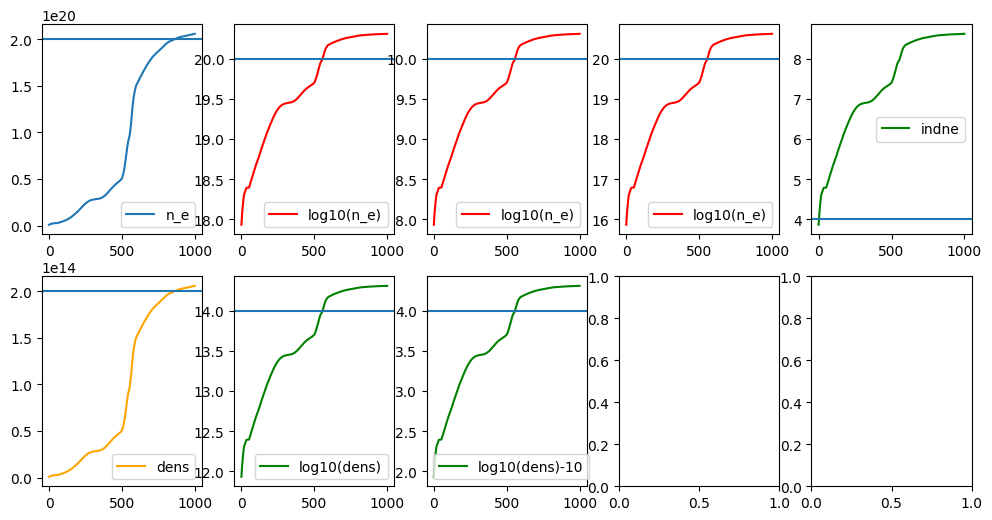

In [74]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Primer subplot
ax[0][0].plot(n_e, label='n_e')
ax[0][0].axhline(2e20)
ax[0][0].legend()

# Segundo subplot
ax[1][0].plot(dens, label='dens', color='orange')
ax[1][0].axhline(2e14)
ax[1][0].legend()

ax[0][1].plot(np.log10(n_e), label='log10(n_e)', color='red')
ax[0][1].axhline(20)
ax[0][1].legend()

ax[1][1].plot(np.log10(dens), label='log10(dens)', color='g')
ax[1][1].axhline(14)
ax[1][1].legend()

ax[0][2].plot(np.log10(n_e)-10, label='log10(n_e)', color='red')
ax[0][2].axhline(10)
ax[0][2].legend()

ax[1][2].plot(np.log10(dens)-10, label='log10(dens)-10', color='g')
ax[1][2].axhline(4)
ax[1][2].legend()

ax[0][3].plot(2*(np.log10(n_e)-10), label='log10(n_e)', color='red')
ax[0][3].axhline(20)
ax[0][3].legend()

ax[0][4].plot(indne, label='indne', color='g')
ax[0][4].axhline(4)
ax[0][4].legend()

In [13]:
sigmav = np.zeros((15,60))
sigmav[0,:] = np.array([1.00000e-99,  1.93923e-83,  6.89061e-68,  4.81352e-56,  2.12250e-46,  9.93199e-39, 
                        1.25671e-32,  9.04277e-28,  6.67852e-24,  8.09280e-21,  2.33560e-18,  2.15831e-16, 
                        8.07713e-15,  1.47468e-13,  1.52339e-12,  9.98880e-12,  4.56713e-11,  1.56457e-10, 
                        4.25656e-10,  9.62858e-10,  1.87782e-09,  3.24950e-09,  5.10420e-09,  7.40869e-09, 
                        1.00762e-08,  1.29813e-08,  1.59765e-08,  1.89101e-08,  2.16417e-08,  2.40538e-08, 
                        2.60594e-08,  2.76056e-08,  2.86722e-08,  2.92677e-08,  2.94235e-08,  2.91866e-08, 
                        2.86140e-08,  2.77660e-08,  2.67027e-08,  2.54802e-08,  2.41490e-08,  2.27526e-08, 
                        2.13275e-08,  1.99032e-08,  1.85028e-08,  1.71439e-08,  1.58392e-08,  1.45975e-08, 
                        1.34241e-08,  1.23219e-08,  1.12919e-08,  1.03333e-08,  9.44439e-09,  8.62253e-09, 
                        7.86463e-09,  7.16725e-09,  6.52676e-09,  5.93948e-09,  5.40175e-09,  4.90998e-09])
sigmav[1,:] = np.array([1.00000e-99,  3.08801e-83,  1.44609e-68,  6.61093e-56,  2.75895e-46,  1.23330e-38, 
                        1.50372e-32,  1.05015e-27,  7.57152e-24,  8.99868e-21,  2.55656e-18,  2.33242e-16, 
                        8.63712e-15,  1.56316e-13,  1.60290e-12,  1.04452e-11,  4.75051e-11,  1.62007e-10, 
                        4.39062e-10,  9.89927e-10,  1.92522e-09,  3.32363e-09,  5.21011e-09,  7.54947e-09, 
                        1.02527e-08,  1.31921e-08,  1.62184e-08,  1.91784e-08,  2.19306e-08,  2.43570e-08, 
                        2.63707e-08,  2.79190e-08,  2.89825e-08,  2.95705e-08,  2.97153e-08,  2.94650e-08, 
                        2.88770e-08,  2.80127e-08,  2.69326e-08,  2.56933e-08,  2.43455e-08,  2.29331e-08, 
                        2.14927e-08,  2.00539e-08,  1.86399e-08,  1.72683e-08,  1.59518e-08,  1.46992e-08, 
                        1.35157e-08,  1.24044e-08,  1.13659e-08,  1.03997e-08,  9.50370e-09,  8.67547e-09, 
                        7.91178e-09,  7.20916e-09,  6.56393e-09,  5.97238e-09,  5.43080e-09,  4.93558e-09])
sigmav[2,:] = np.array([5.02155e-94,  5.61298e-83,  2.01483e-68,  1.01676e-55,  3.96596e-46,  1.67642e-38, 
                        1.95224e-32,  1.31341e-27,  9.18722e-24,  1.06529e-20,  2.96557e-18,  2.65962e-16, 
                        9.70465e-15,  1.73375e-13,  1.75725e-12,  1.13324e-11,  5.10556e-11,  1.72647e-10, 
                        4.64378e-10,  1.04004e-09,  2.01092e-09,  3.45409e-09,  5.39125e-09,  7.78327e-09, 
                        1.05374e-08,  1.35232e-08,  1.65890e-08,  1.95805e-08,  2.23556e-08,  2.47963e-08, 
                        2.68160e-08,  2.83628e-08,  2.94184e-08,  2.99932e-08,  3.01207e-08,  2.98500e-08, 
                        2.92397e-08,  2.83519e-08,  2.72479e-08,  2.59849e-08,  2.46139e-08,  2.31792e-08, 
                        2.17176e-08,  2.02588e-08,  1.88261e-08,  1.74372e-08,  1.61046e-08,  1.48372e-08, 
                        1.36402e-08,  1.25165e-08,  1.14668e-08,  1.04902e-08,  9.58494e-09,  8.74826e-09, 
                        7.97693e-09,  7.26741e-09,  6.61595e-09,  6.01878e-09,  5.47214e-09,  4.97237e-09])
sigmav[3,:] = np.array([5.02155e-94,  1.21407e-82,  2.72028e-67,  1.85445e-55,  6.72737e-46,  2.66857e-38, 
                        2.94291e-32,  1.89009e-27,  1.27059e-23,  1.42341e-20,  3.84394e-18,  3.35462e-16, 
                        1.19403e-14,  2.08505e-13,  2.06925e-12,  1.30910e-11,  5.79549e-11,  1.92922e-10, 
                        5.11701e-10,  1.13197e-09,  2.16518e-09,  3.68451e-09,  5.70499e-09,  8.18013e-09, 
                        1.10109e-08,  1.40621e-08,  1.71800e-08,  2.02091e-08,  2.30078e-08,  2.54591e-08, 
                        2.74780e-08,  2.90144e-08,  3.00515e-08,  3.06018e-08,  3.07000e-08,  3.03970e-08, 
                        2.97526e-08,  2.88297e-08,  2.76907e-08,  2.63932e-08,  2.49889e-08,  2.35223e-08, 
                        2.20305e-08,  2.05434e-08,  1.90843e-08,  1.76708e-08,  1.63157e-08,  1.50275e-08, 
                        1.38115e-08,  1.26705e-08,  1.16050e-08,  1.06142e-08,  9.69599e-09,  8.84763e-09, 
                        8.06578e-09,  7.34678e-09,  6.68680e-09,  6.08199e-09,  5.52848e-09,  5.02256e-09])
sigmav[4,:] = np.array([1.00000e-99,  3.19565e-82,  4.18721e-67,  4.17673e-55,  1.40099e-45,  5.15844e-38, 
                        5.30819e-32,  3.19983e-27,  2.03100e-23,  2.16062e-20,  5.57007e-18,  4.66256e-16, 
                        1.59854e-14,  2.69884e-13,  2.59804e-12,  1.59955e-11,  6.91065e-11,  2.25123e-10, 
                        5.85824e-10,  1.27442e-09,  2.40234e-09,  4.03669e-09,  6.18242e-09,  8.78196e-09, 
                        1.17266e-08,  1.48744e-08,  1.80675e-08,  2.11495e-08,  2.39793e-08,  2.64419e-08, 
                        2.84550e-08,  2.99714e-08,  3.09774e-08,  3.14880e-08,  3.15405e-08,  3.11880e-08, 
                        3.04918e-08,  2.95165e-08,  2.83255e-08,  2.69772e-08,  2.55242e-08,  2.40112e-08, 
                        2.24756e-08,  2.09474e-08,  1.94502e-08,  1.80015e-08,  1.66139e-08,  1.52960e-08, 
                        1.40528e-08,  1.28870e-08,  1.17991e-08,  1.07879e-08,  9.85127e-09,  8.98633e-09, 
                        8.18954e-09,  7.45712e-09,  6.78510e-09,  6.16949e-09,  5.60633e-09,  5.09177e-09])
sigmav[5,:] = np.array([1.00000e-99,  9.52529e-82,  1.19701e-66,  1.07741e-54,  3.31427e-45,  1.11936e-37, 
                        1.06082e-31,  5.92680e-27,  3.51233e-23,  3.51436e-20,  8.57944e-18,  6.84166e-16, 
                        2.24629e-14,  3.64844e-13,  3.39221e-12,  2.02490e-11,  8.51006e-11,  2.70549e-10, 
                        6.89107e-10,  1.47130e-09,  2.72871e-09,  4.52099e-09,  6.84050e-09,  9.61544e-09, 
                        1.27242e-08,  1.60150e-08,  1.93237e-08,  2.24907e-08,  2.53748e-08,  2.78627e-08, 
                        2.98752e-08,  3.13689e-08,  3.23341e-08,  3.27899e-08,  3.27776e-08,  3.23533e-08, 
                        3.15814e-08,  3.05288e-08,  2.92605e-08,  2.78369e-08,  2.63110e-08,  2.47287e-08, 
                        2.31278e-08,  2.15385e-08,  1.99845e-08,  1.84834e-08,  1.70476e-08,  1.56856e-08, 
                        1.44023e-08,  1.32000e-08,  1.20790e-08,  1.10379e-08,  1.00744e-08,  9.18520e-09, 
                        8.36663e-09,  7.61467e-09,  6.92516e-09,  6.29390e-09,  5.71676e-09,  5.18974e-09])
sigmav[6,:] = np.array([5.02155e-94,  1.27796e-79,  3.53013e-66,  3.02561e-54,  8.53989e-45,  2.63882e-37, 
                        2.29129e-31,  1.17818e-26,  6.46754e-23,  6.03915e-20,  1.38638e-17,  1.04711e-15, 
                        3.27702e-14,  5.10164e-13,  4.56794e-12,  2.63735e-11,  1.07611e-10,  3.33347e-10, 
                        8.30037e-10,  1.73776e-09,  3.16898e-09,  5.17512e-09,  7.73404e-09,  1.07569e-08, 
                        1.41054e-08,  1.76140e-08,  2.11077e-08,  2.44203e-08,  2.74072e-08,  2.99553e-08, 
                        3.19878e-08,  3.34655e-08,  3.43843e-08,  3.47692e-08,  3.46670e-08,  3.41395e-08, 
                        3.32557e-08,  3.20868e-08,  3.07012e-08,  2.91615e-08,  2.75231e-08,  2.58330e-08, 
                        2.41302e-08,  2.24454e-08,  2.08027e-08,  1.92196e-08,  1.77085e-08,  1.62777e-08, 
                        1.49318e-08,  1.36728e-08,  1.25005e-08,  1.14132e-08,  1.04081e-08,  9.48171e-09, 
                        8.62980e-09,  7.84806e-09,  7.13197e-09,  6.47704e-09,  5.87884e-09,  5.33309e-09])
sigmav[7,:] = np.array([1.00000e-99,  9.49905e-81,  1.21157e-65,  9.63177e-54,  2.50897e-44,  7.07421e-37, 
                        5.58076e-31,  2.61346e-26,  1.31537e-22,  1.13546e-19,  2.42899e-17,  1.72162e-15, 
                        5.08790e-14,  7.52327e-13,  6.43388e-12,  3.56797e-11,  1.40576e-10,  4.22650e-10, 
                        1.02627e-09,  2.10411e-09,  3.77155e-09,  6.07296e-09,  8.97160e-09,  1.23596e-08, 
                        1.60778e-08,  1.99399e-08,  2.37526e-08,  2.73347e-08,  3.05313e-08,  3.32238e-08, 
                        3.53349e-08,  3.68290e-08,  3.77083e-08,  3.80062e-08,  3.77787e-08,  3.70969e-08, 
                        3.60386e-08,  3.46826e-08,  3.31039e-08,  3.13707e-08,  2.95424e-08,  2.76695e-08, 
                        2.57929e-08,  2.39450e-08,  2.21505e-08,  2.04275e-08,  1.87883e-08,  1.72408e-08, 
                        1.57892e-08,  1.44348e-08,  1.31767e-08,  1.20125e-08,  1.09387e-08,  9.95088e-09, 
                        9.04435e-09,  8.21404e-09,  7.45483e-09,  6.76166e-09,  6.12960e-09,  5.55389e-09])
sigmav[8,:] = np.array([5.02157e-94,  1.52401e-79,  4.64668e-65,  3.52562e-53,  8.60248e-44,  2.23707e-36, 
                        1.61239e-30,  6.86706e-26,  3.13746e-22,  2.45906e-19,  4.78939e-17,  3.10847e-15, 
                        8.48355e-14,  1.17030e-12,  9.43638e-12,  4.98402e-11,  1.88682e-10,  5.49278e-10, 
                        1.29978e-09,  2.61118e-09,  4.60686e-09,  7.32802e-09,  1.07249e-08,  1.46683e-08, 
                        1.89719e-08,  2.34184e-08,  2.77831e-08,  3.18564e-08,  3.54606e-08,  3.84622e-08, 
                        4.07768e-08,  4.23693e-08,  4.32485e-08,  4.34589e-08,  4.30706e-08,  4.21692e-08, 
                        4.08473e-08,  3.91975e-08,  3.73067e-08,  3.52535e-08,  3.31056e-08,  3.09200e-08, 
                        2.87424e-08,  2.66088e-08,  2.45462e-08,  2.25740e-08,  2.07050e-08,  1.89472e-08, 
                        1.73042e-08,  1.57766e-08,  1.43625e-08,  1.30585e-08,  1.18598e-08,  1.07608e-08, 
                        9.75556e-09,  8.83789e-09,  8.00154e-09,  7.24040e-09,  6.54854e-09,  5.92032e-09])
sigmav[9,:] = np.array([6.57984e-99,  3.12266e-79,  1.90237e-64,  1.39798e-52,  3.26114e-43,  7.99326e-36, 
                        5.34708e-30,  2.08169e-25,  8.59191e-22,  6.04879e-19,  1.05911e-16,  6.21818e-15, 
                        1.55015e-13,  1.97574e-12,  1.48881e-11,  7.42751e-11,  2.68099e-10,  7.50404e-10, 
                        1.72007e-09,  3.36947e-09,  5.83003e-09,  9.13864e-09,  1.32310e-08,  1.79548e-08, 
                        2.30925e-08,  2.83899e-08,  3.35826e-08,  3.84224e-08,  4.26980e-08,  4.62497e-08, 
                        4.89764e-08,  5.08358e-08,  5.18383e-08,  5.20368e-08,  5.15155e-08,  5.03774e-08, 
                        4.87340e-08,  4.66970e-08,  4.43717e-08,  4.18534e-08,  3.92245e-08,  3.65541e-08, 
                        3.38983e-08,  3.13009e-08,  2.87948e-08,  2.64035e-08,  2.41427e-08,  2.20217e-08, 
                        2.00446e-08,  1.82117e-08,  1.65205e-08,  1.49659e-08,  1.35419e-08,  1.22411e-08, 
                        1.10557e-08,  9.97781e-09,  8.99934e-09,  8.11247e-09,  7.30968e-09,  6.58379e-09])
sigmav[10,:]= np.array([5.02165e-94,  7.23483e-79,  7.18473e-64,  5.20288e-52,  1.18541e-42,  2.80684e-35, 
                        1.78891e-29,  6.54358e-25,  2.50868e-21,  1.62582e-18,  2.59802e-16,  1.38202e-14, 
                        3.11275e-13,  3.59539e-12,  2.47501e-11,  1.14059e-10,  3.85018e-10,  1.02035e-09, 
                        2.23998e-09,  4.24477e-09,  7.16452e-09,  1.10289e-08,  1.57632e-08,  2.12011e-08, 
                        2.71066e-08,  3.32026e-08,  3.91980e-08,  4.48166e-08,  4.98202e-08,  5.40250e-08, 
                        5.73106e-08,  5.96211e-08,  6.09590e-08,  6.13749e-08,  6.09551e-08,  5.98088e-08, 
                        5.80569e-08,  5.58220e-08,  5.32219e-08,  5.03646e-08,  4.73454e-08,  4.42457e-08, 
                        4.11331e-08,  3.80619e-08,  3.50745e-08,  3.22025e-08,  2.94686e-08,  2.68879e-08, 
                        2.44691e-08,  2.22162e-08,  2.01291e-08,  1.82046e-08,  1.64373e-08,  1.48205e-08, 
                        1.33459e-08,  1.20049e-08,  1.07884e-08,  9.68734e-09,  8.69263e-09,  7.79552e-09])
sigmav[11,:]= np.array([5.02166e-94,  2.11229e-78,  2.24556e-63,  1.64685e-51,  3.76181e-42,  8.83729e-35, 
                        5.53407e-29,  1.96853e-24,  7.23477e-21,  4.38191e-18,  6.32570e-16,  2.95914e-14, 
                        5.81675e-13,  5.92425e-12,  3.66632e-11,  1.55190e-10,  4.90717e-10,  1.23849e-09, 
                        2.62341e-09,  4.84507e-09,  8.02964e-09,  1.22034e-08,  1.72886e-08,  2.31155e-08, 
                        2.94424e-08,  3.59846e-08,  4.24410e-08,  4.85240e-08,  5.39834e-08,  5.86240e-08, 
                        6.23155e-08,  6.49935e-08,  6.66539e-08,  6.73428e-08,  6.71440e-08,  6.61657e-08, 
                        6.45290e-08,  6.23581e-08,  5.97730e-08,  5.68847e-08,  5.37918e-08,  5.05796e-08, 
                        4.73193e-08,  4.40694e-08,  4.08762e-08,  3.77754e-08,  3.47938e-08,  3.19501e-08, 
                        2.92571e-08,  2.67223e-08,  2.43489e-08,  2.21372e-08,  2.00847e-08,  1.81872e-08, 
                        1.64392e-08,  1.48339e-08,  1.33641e-08,  1.20222e-08,  1.08000e-08,  9.68976e-09])
sigmav[12,:]= np.array([1.02081e-98,  4.47311e-78,  5.34817e-63,  4.14904e-51,  9.77616e-42,  2.35249e-34, 
                        1.48572e-28,  5.25591e-24,  1.86340e-20,  1.02703e-17,  1.27333e-15,  5.03562e-14, 
                        8.56836e-13,  7.82720e-12,  4.48312e-11,  1.79786e-10,  5.47667e-10,  1.34709e-09, 
                        2.80338e-09,  5.11463e-09,  8.40560e-09,  1.27017e-08,  1.79249e-08,  2.39045e-08, 
                        3.03980e-08,  3.71182e-08,  4.37610e-08,  5.00353e-08,  5.56869e-08,  6.05171e-08, 
                        6.43918e-08,  6.72436e-08,  6.90662e-08,  6.99038e-08,  6.98389e-08,  6.89790e-08, 
                        6.74448e-08,  6.53604e-08,  6.28462e-08,  6.00133e-08,  5.69610e-08,  5.37750e-08, 
                        5.05272e-08,  4.72765e-08,  4.40699e-08,  4.09436e-08,  3.79250e-08,  3.50335e-08, 
                        3.22823e-08,  2.96795e-08,  2.72292e-08,  2.49320e-08,  2.27865e-08,  2.07890e-08, 
                        1.89348e-08,  1.72182e-08,  1.56327e-08,  1.41717e-08,  1.28281e-08,  1.15951e-08])
sigmav[13,:]= np.array([7.36093e-99,  6.06931e-78,  8.53837e-63,  7.35153e-51,  1.85978e-41,  4.68546e-34, 
                        3.08545e-28,  1.10201e-23,  3.74288e-20,  1.81668e-17,  1.90634e-15,  6.56158e-14, 
                        1.01772e-12,  8.77381e-12,  4.84655e-11,  1.89940e-10,  5.69929e-10,  1.38795e-09, 
                        2.86925e-09,  5.21207e-09,  8.54009e-09,  1.28799e-08,  1.81517e-08,  2.41857e-08, 
                        3.07368e-08,  3.75185e-08,  4.42257e-08,  5.05663e-08,  5.62850e-08,  6.11817e-08, 
                        6.51216e-08,  6.80363e-08,  6.99187e-08,  7.08127e-08,  7.08002e-08,  6.99885e-08, 
                        6.84982e-08,  6.64537e-08,  6.39751e-08,  6.11739e-08,  5.81493e-08,  5.49873e-08, 
                        5.17599e-08,  4.85263e-08,  4.53334e-08,  4.22178e-08,  3.92068e-08,  3.63199e-08, 
                        3.35705e-08,  3.09666e-08,  2.85124e-08,  2.62086e-08,  2.40536e-08,  2.20439e-08, 
                        2.01749e-08,  1.84406e-08,  1.68348e-08,  1.53508e-08,  1.39816e-08,  1.27203e-08])
sigmav[14,:]= np.array([6.38105e-99,  6.80257e-78,  8.60837e-63,  7.83728e-51,  2.31015e-41,  6.54058e-34, 
                        4.51976e-28,  1.65716e-23,  5.46805e-20,  2.40282e-17,  2.26542e-15,  7.26816e-14, 
                        1.08308e-12,  9.13105e-12,  4.97793e-11,  1.93504e-10,  5.77529e-10,  1.40178e-09, 
                        2.89141e-09,  5.24401e-09,  8.58370e-09,  1.29380e-08,  1.82248e-08,  2.42751e-08, 
                        3.08494e-08,  3.76528e-08,  4.43870e-08,  5.07519e-08,  5.64953e-08,  6.14129e-08, 
                        6.53730e-08,  6.83073e-08,  7.02083e-08,  7.11199e-08,  7.11239e-08,  7.03277e-08, 
                        6.88519e-08,  6.68206e-08,  6.43543e-08,  6.15643e-08,  5.85500e-08,  5.53973e-08, 
                        5.21785e-08,  4.89525e-08,  4.57666e-08,  4.26572e-08,  3.96516e-08,  3.67696e-08, 
                        3.40243e-08,  3.14241e-08,  2.89729e-08,  2.66715e-08,  2.45184e-08,  2.25100e-08, 
                        2.06417e-08,  1.89076e-08,  1.73014e-08,  1.58163e-08,  1.44454e-08,  1.31819e-08])
print(sigmav.shape)

(15, 60)


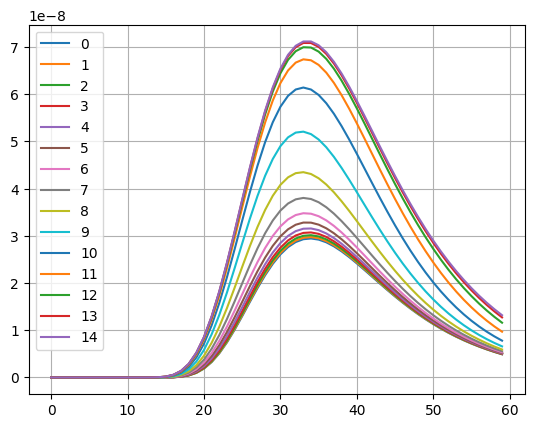

In [104]:
for i in range(len(sigmav)):
    plt.plot(sigmav[i,:],label=f'{i}')
plt.legend()    
plt.grid(True)

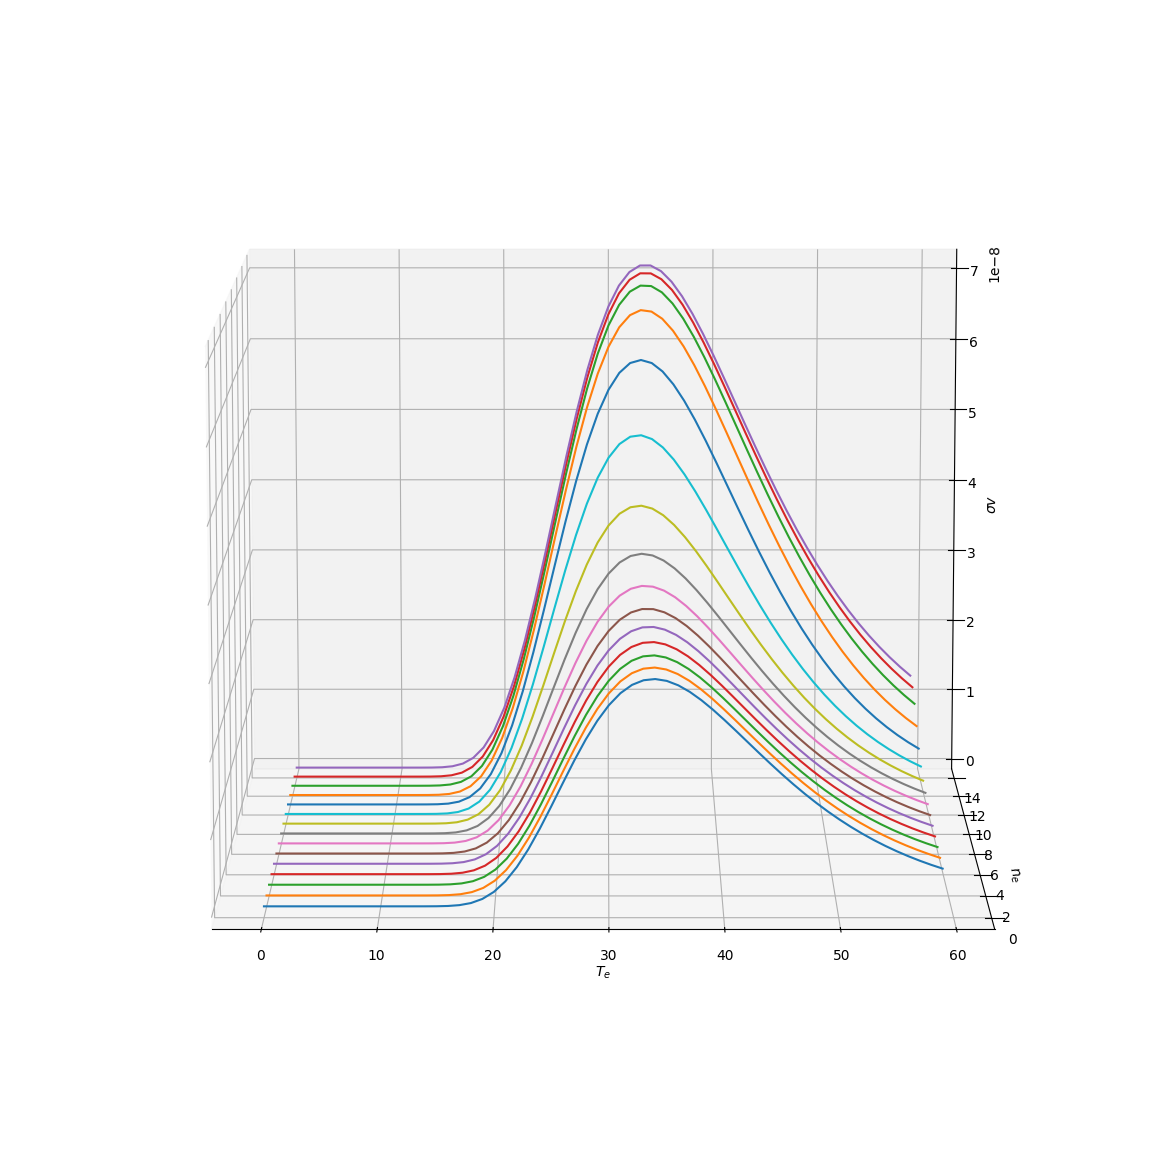

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes 3D
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas x e y
x = np.arange(sigmav.shape[1])
# print(x)

# Graficar cada curva en 3D
for i in range(sigmav.shape[0]):
    z = sigmav[i, :]  # Cambiar 'y' por 'z'
    y = np.full_like(x, i) 
    ax.plot(x, y, z, label=f'Curva {i}') 

ax.set_xlabel(r'$T_e$')
ax.set_ylabel(r'$n_e$')
ax.set_zlabel(r'$\sigma v$')
ax.grid(True)
ax.view_init(elev=10, azim=-90)
plt.show()


In [ ]:
# n_range = np.logspace(np.log10(1e10),np.log10(1e17),15)
# n_range = np.linspace(1e10,1e17,15)
# t_range = np.logspace(np.log10(0.0631),np.log10(50118.72),60)
n_range = np.linspace(1e10,1e17,15)
t_range = np.linspace(0.0631,50118.72,60)
n_range.shape,t_range.shape,sigmav.shape[0]

((15,), (60,), 15)

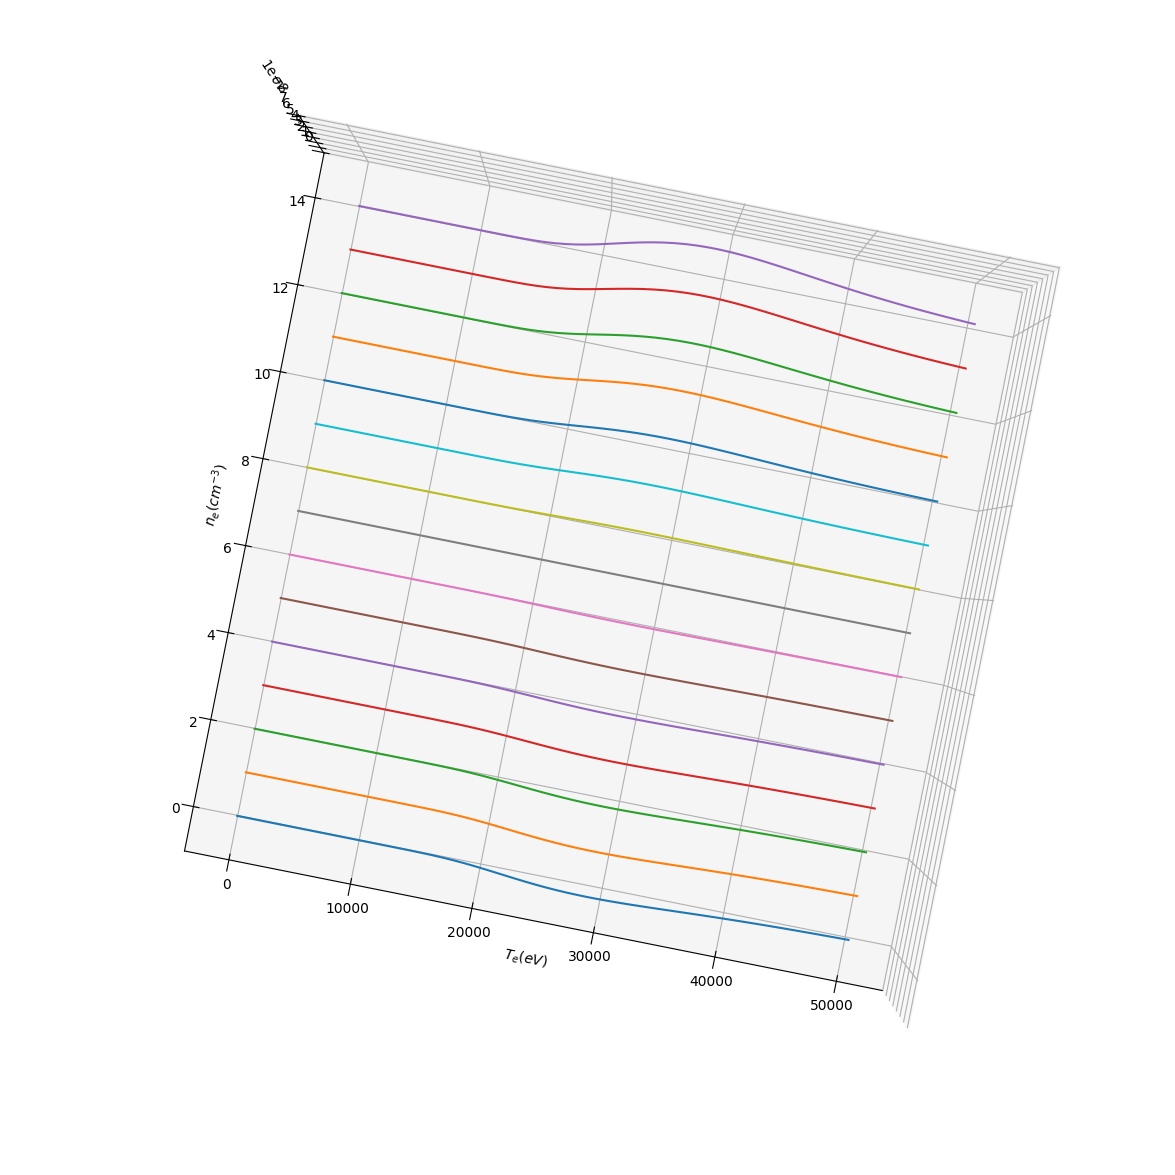

In [ ]:
n_range = np.linspace(1e10,1e17,15)
t_range = np.linspace(0.0631,50118.72,60)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
# Crear figura y ejes 3D
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas x e y
x = copy.copy(t_range)

# Graficar cada curva en 3D
for i in range(sigmav.shape[0]):
    z = sigmav[i, :]  # Cambiar 'y' por 'z'
    # print(z.shape)
    y = np.full_like(x,i)
    # print('y.shape:',y.shape)
    ax.plot(x, y, z, label=f'Curva {i}') 

ax.set_xlabel(r'$T_e (eV)$')
ax.set_ylabel(r'$n_e (cm^{-3})$')
ax.set_zlabel(r'$\sigma v$')
# ax.set_yticks(n_range)
ax.grid(True)
ax.view_init(elev=90, azim=-80)
plt.show()

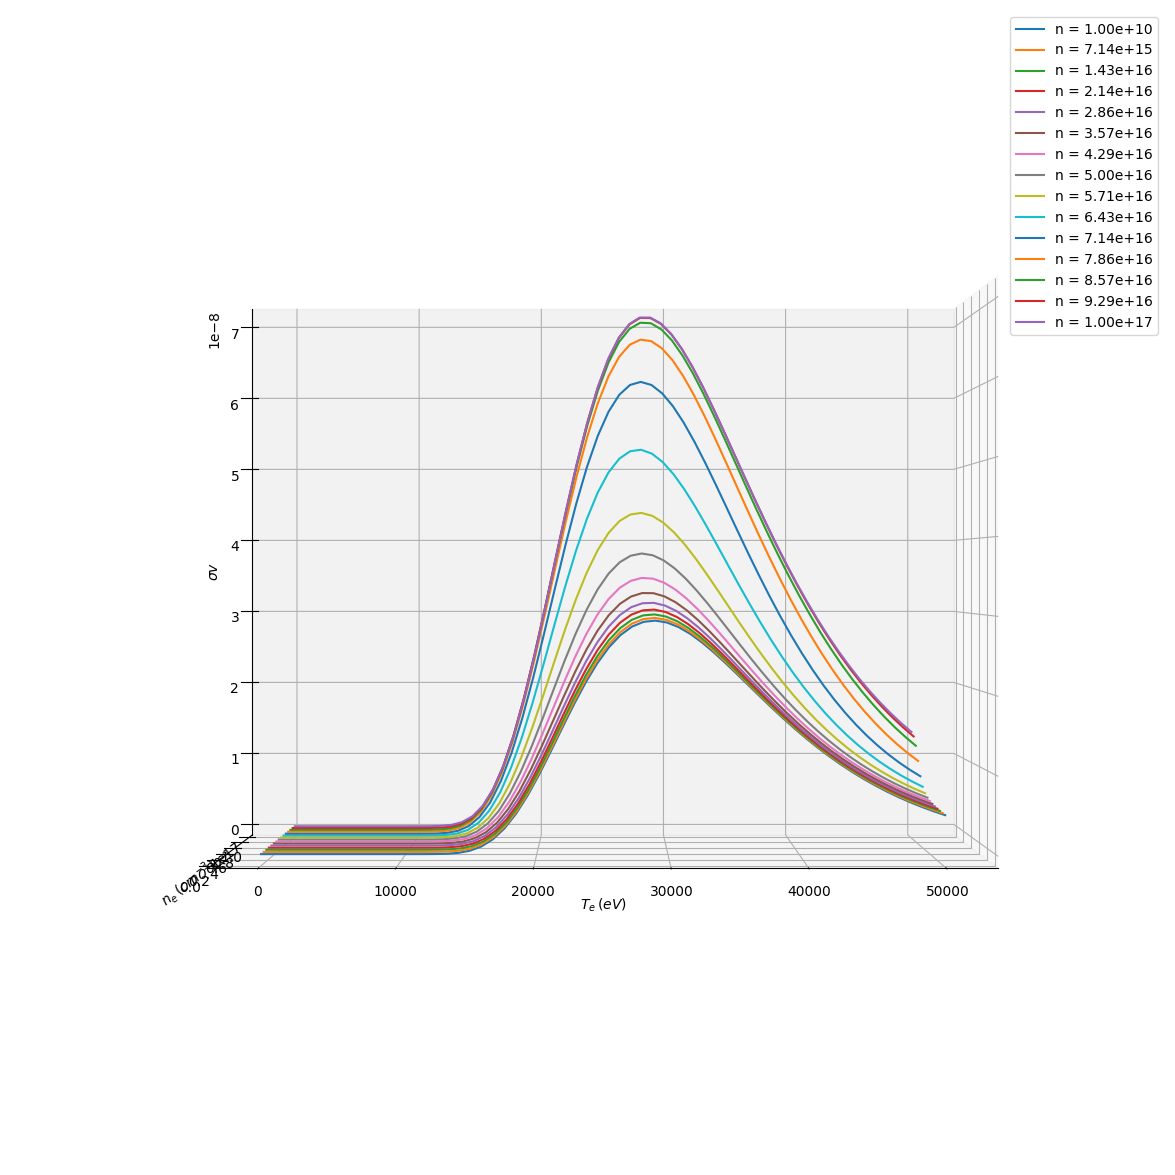

In [285]:
# Crear figura y ejes 3D
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Iterar sobre las densidades (n_range) para graficar las curvas
for i, n in enumerate(n_range):
    x = copy.copy(t_range)    # Temperaturas (T) para el eje X
    y = np.full_like(x, n)    # Crear una fila constante de densidad (n) para el eje Y
    z = sigmav[i, :]          # Sección correspondiente de sigmav para el eje Z
    ax.plot(x, y, z, label=f'n = {n:.2e}')

# Etiquetas de los ejes
ax.set_xlabel(r'$T_e \, (eV)$')
ax.set_ylabel(r'$n_e \, (cm^{-3})$')
ax.set_zlabel(r'$\sigma v$')

# Configuración adicional
ax.grid(True)
# ax.set_xlim(0,1500)
# ax.set_zlim(0,1e-78)
ax.view_init(elev=0, azim=-90)  # Ajusta la vista para una mejor visualización
plt.legend()
plt.show()

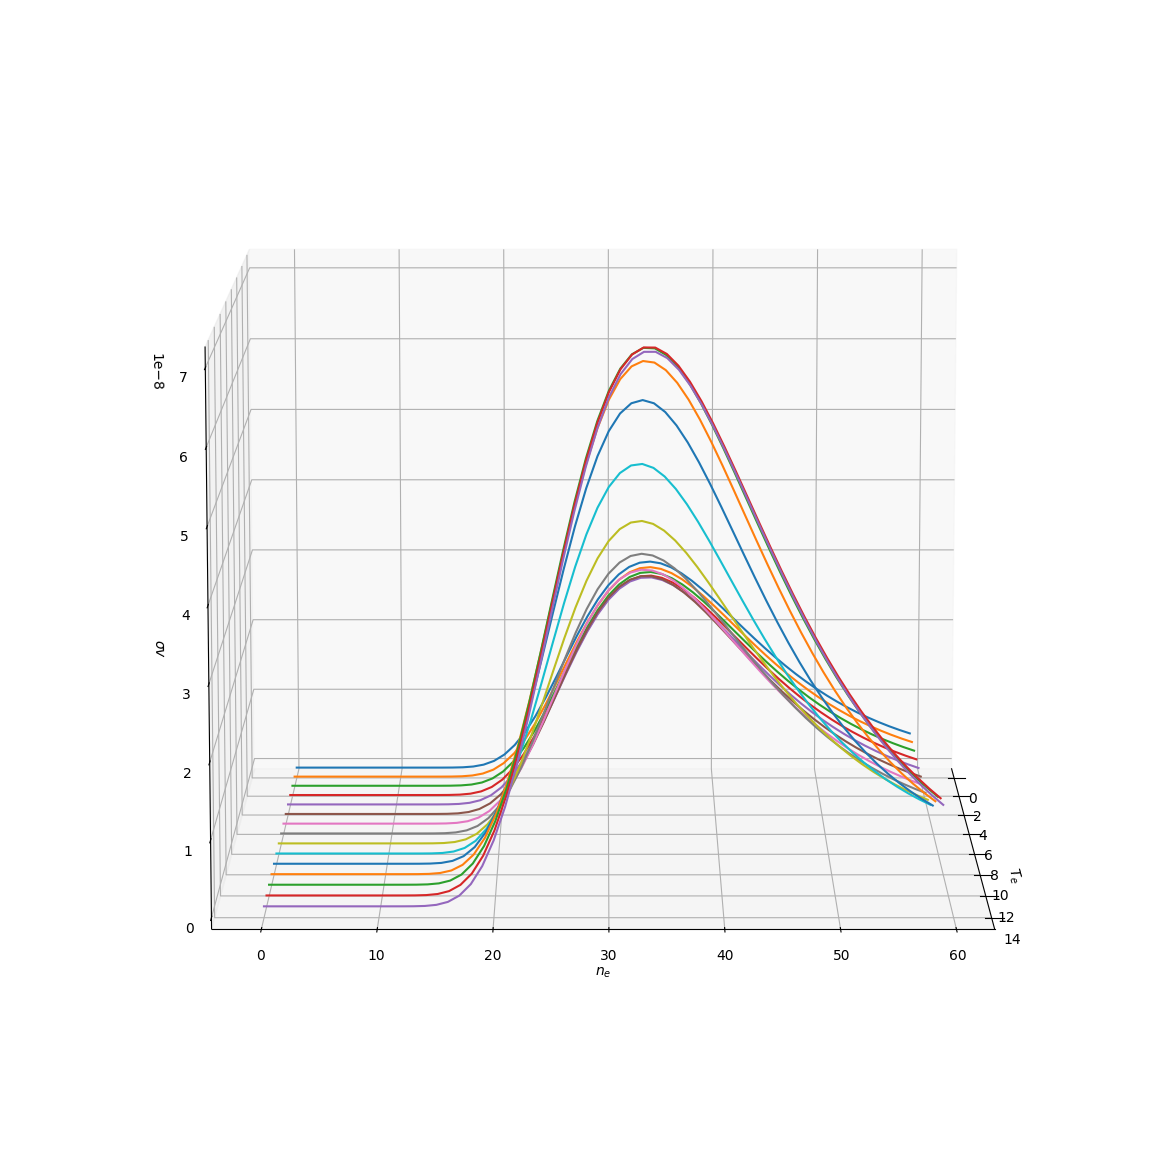

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes 3D
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas x e y
y = np.arange(sigmav.shape[1])
# print(x)

# Graficar cada curva en 3D
for i in range(sigmav.shape[0]):
    z = sigmav[i, :]  # Cambiar 'y' por 'z'
    x = np.full_like(y, i) 
    ax.plot(x, y, z, label=f'Curva {i}') 

ax.set_xlabel(r'$T_e$')
ax.set_ylabel(r'$n_e$')
ax.set_zlabel(r'$\sigma v$')
ax.grid(True)
ax.view_init(elev=10, azim=0)
plt.show()


In [161]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
from scipy.interpolate import RegularGridInterpolator

In [16]:
x = np.linspace(min(t_e), max(t_e), sigmav.shape[0])  # Eje para las filas
y = np.linspace(min(n_e), max(n_e), sigmav.shape[1])  # Eje para las columnas

# Configura el interpolador
interpolator = RegularGridInterpolator((x, y), sigmav)
# Combina los valores reales de t_e y n_e para interpolar
points = np.array([t_e, n_e]).T  # Puntos (t_e, n_e)

# Realiza la interpolación
result = interpolator(points)

In [98]:
result

array([1.00000000e-99, 3.70450047e-85, 7.40900093e-85, ...,
       1.31822396e-08, 1.31820704e-08, 1.31819000e-08])

In [ ]:
def collrad_sigma_ion_h0(n_e,t_e):
    if len(n_e) != len(t_e):
        print('Number of elements in inputs do not match')

    temp = np.float64(t_e)  # o simplemente float(t_e)
    dens = np.float64(n_e)  # o simplemente float(n_e)

    dens = dens/(1e6)
    indte = 10 * (np.log10(temp) + 1.2)
    indte = np.clip(indte, 0, 59)

    indne = 2*(np.log10(dens) - 10)
    indne = np.clip(indne, 0, 14)

    sigmav = np.zeros((15,60))
    sigmav[0,:] = np.array([1.00000e-99,  1.93923e-83,  6.89061e-68,  4.81352e-56,  2.12250e-46,  9.93199e-39, 
                            1.25671e-32,  9.04277e-28,  6.67852e-24,  8.09280e-21,  2.33560e-18,  2.15831e-16, 
                            8.07713e-15,  1.47468e-13,  1.52339e-12,  9.98880e-12,  4.56713e-11,  1.56457e-10, 
                            4.25656e-10,  9.62858e-10,  1.87782e-09,  3.24950e-09,  5.10420e-09,  7.40869e-09, 
                            1.00762e-08,  1.29813e-08,  1.59765e-08,  1.89101e-08,  2.16417e-08,  2.40538e-08, 
                            2.60594e-08,  2.76056e-08,  2.86722e-08,  2.92677e-08,  2.94235e-08,  2.91866e-08, 
                            2.86140e-08,  2.77660e-08,  2.67027e-08,  2.54802e-08,  2.41490e-08,  2.27526e-08, 
                            2.13275e-08,  1.99032e-08,  1.85028e-08,  1.71439e-08,  1.58392e-08,  1.45975e-08, 
                            1.34241e-08,  1.23219e-08,  1.12919e-08,  1.03333e-08,  9.44439e-09,  8.62253e-09, 
                            7.86463e-09,  7.16725e-09,  6.52676e-09,  5.93948e-09,  5.40175e-09,  4.90998e-09])
    sigmav[1,:] = np.array([1.00000e-99,  3.08801e-83,  1.44609e-68,  6.61093e-56,  2.75895e-46,  1.23330e-38, 
                            1.50372e-32,  1.05015e-27,  7.57152e-24,  8.99868e-21,  2.55656e-18,  2.33242e-16, 
                            8.63712e-15,  1.56316e-13,  1.60290e-12,  1.04452e-11,  4.75051e-11,  1.62007e-10, 
                            4.39062e-10,  9.89927e-10,  1.92522e-09,  3.32363e-09,  5.21011e-09,  7.54947e-09, 
                            1.02527e-08,  1.31921e-08,  1.62184e-08,  1.91784e-08,  2.19306e-08,  2.43570e-08, 
                            2.63707e-08,  2.79190e-08,  2.89825e-08,  2.95705e-08,  2.97153e-08,  2.94650e-08, 
                            2.88770e-08,  2.80127e-08,  2.69326e-08,  2.56933e-08,  2.43455e-08,  2.29331e-08, 
                            2.14927e-08,  2.00539e-08,  1.86399e-08,  1.72683e-08,  1.59518e-08,  1.46992e-08, 
                            1.35157e-08,  1.24044e-08,  1.13659e-08,  1.03997e-08,  9.50370e-09,  8.67547e-09, 
                            7.91178e-09,  7.20916e-09,  6.56393e-09,  5.97238e-09,  5.43080e-09,  4.93558e-09])
    sigmav[2,:] = np.array([5.02155e-94,  5.61298e-83,  2.01483e-68,  1.01676e-55,  3.96596e-46,  1.67642e-38, 
                            1.95224e-32,  1.31341e-27,  9.18722e-24,  1.06529e-20,  2.96557e-18,  2.65962e-16, 
                            9.70465e-15,  1.73375e-13,  1.75725e-12,  1.13324e-11,  5.10556e-11,  1.72647e-10, 
                            4.64378e-10,  1.04004e-09,  2.01092e-09,  3.45409e-09,  5.39125e-09,  7.78327e-09, 
                            1.05374e-08,  1.35232e-08,  1.65890e-08,  1.95805e-08,  2.23556e-08,  2.47963e-08, 
                            2.68160e-08,  2.83628e-08,  2.94184e-08,  2.99932e-08,  3.01207e-08,  2.98500e-08, 
                            2.92397e-08,  2.83519e-08,  2.72479e-08,  2.59849e-08,  2.46139e-08,  2.31792e-08, 
                            2.17176e-08,  2.02588e-08,  1.88261e-08,  1.74372e-08,  1.61046e-08,  1.48372e-08, 
                            1.36402e-08,  1.25165e-08,  1.14668e-08,  1.04902e-08,  9.58494e-09,  8.74826e-09, 
                            7.97693e-09,  7.26741e-09,  6.61595e-09,  6.01878e-09,  5.47214e-09,  4.97237e-09])
    sigmav[3,:] = np.array([5.02155e-94,  1.21407e-82,  2.72028e-67,  1.85445e-55,  6.72737e-46,  2.66857e-38, 
                            2.94291e-32,  1.89009e-27,  1.27059e-23,  1.42341e-20,  3.84394e-18,  3.35462e-16, 
                            1.19403e-14,  2.08505e-13,  2.06925e-12,  1.30910e-11,  5.79549e-11,  1.92922e-10, 
                            5.11701e-10,  1.13197e-09,  2.16518e-09,  3.68451e-09,  5.70499e-09,  8.18013e-09, 
                            1.10109e-08,  1.40621e-08,  1.71800e-08,  2.02091e-08,  2.30078e-08,  2.54591e-08, 
                            2.74780e-08,  2.90144e-08,  3.00515e-08,  3.06018e-08,  3.07000e-08,  3.03970e-08, 
                            2.97526e-08,  2.88297e-08,  2.76907e-08,  2.63932e-08,  2.49889e-08,  2.35223e-08, 
                            2.20305e-08,  2.05434e-08,  1.90843e-08,  1.76708e-08,  1.63157e-08,  1.50275e-08, 
                            1.38115e-08,  1.26705e-08,  1.16050e-08,  1.06142e-08,  9.69599e-09,  8.84763e-09, 
                            8.06578e-09,  7.34678e-09,  6.68680e-09,  6.08199e-09,  5.52848e-09,  5.02256e-09])
    sigmav[4,:] = np.array([1.00000e-99,  3.19565e-82,  4.18721e-67,  4.17673e-55,  1.40099e-45,  5.15844e-38, 
                            5.30819e-32,  3.19983e-27,  2.03100e-23,  2.16062e-20,  5.57007e-18,  4.66256e-16, 
                            1.59854e-14,  2.69884e-13,  2.59804e-12,  1.59955e-11,  6.91065e-11,  2.25123e-10, 
                            5.85824e-10,  1.27442e-09,  2.40234e-09,  4.03669e-09,  6.18242e-09,  8.78196e-09, 
                            1.17266e-08,  1.48744e-08,  1.80675e-08,  2.11495e-08,  2.39793e-08,  2.64419e-08, 
                            2.84550e-08,  2.99714e-08,  3.09774e-08,  3.14880e-08,  3.15405e-08,  3.11880e-08, 
                            3.04918e-08,  2.95165e-08,  2.83255e-08,  2.69772e-08,  2.55242e-08,  2.40112e-08, 
                            2.24756e-08,  2.09474e-08,  1.94502e-08,  1.80015e-08,  1.66139e-08,  1.52960e-08, 
                            1.40528e-08,  1.28870e-08,  1.17991e-08,  1.07879e-08,  9.85127e-09,  8.98633e-09, 
                            8.18954e-09,  7.45712e-09,  6.78510e-09,  6.16949e-09,  5.60633e-09,  5.09177e-09])
    sigmav[5,:] = np.array([1.00000e-99,  9.52529e-82,  1.19701e-66,  1.07741e-54,  3.31427e-45,  1.11936e-37, 
                            1.06082e-31,  5.92680e-27,  3.51233e-23,  3.51436e-20,  8.57944e-18,  6.84166e-16, 
                            2.24629e-14,  3.64844e-13,  3.39221e-12,  2.02490e-11,  8.51006e-11,  2.70549e-10, 
                            6.89107e-10,  1.47130e-09,  2.72871e-09,  4.52099e-09,  6.84050e-09,  9.61544e-09, 
                            1.27242e-08,  1.60150e-08,  1.93237e-08,  2.24907e-08,  2.53748e-08,  2.78627e-08, 
                            2.98752e-08,  3.13689e-08,  3.23341e-08,  3.27899e-08,  3.27776e-08,  3.23533e-08, 
                            3.15814e-08,  3.05288e-08,  2.92605e-08,  2.78369e-08,  2.63110e-08,  2.47287e-08, 
                            2.31278e-08,  2.15385e-08,  1.99845e-08,  1.84834e-08,  1.70476e-08,  1.56856e-08, 
                            1.44023e-08,  1.32000e-08,  1.20790e-08,  1.10379e-08,  1.00744e-08,  9.18520e-09, 
                            8.36663e-09,  7.61467e-09,  6.92516e-09,  6.29390e-09,  5.71676e-09,  5.18974e-09])
    sigmav[6,:] = np.array([5.02155e-94,  1.27796e-79,  3.53013e-66,  3.02561e-54,  8.53989e-45,  2.63882e-37, 
                            2.29129e-31,  1.17818e-26,  6.46754e-23,  6.03915e-20,  1.38638e-17,  1.04711e-15, 
                            3.27702e-14,  5.10164e-13,  4.56794e-12,  2.63735e-11,  1.07611e-10,  3.33347e-10, 
                            8.30037e-10,  1.73776e-09,  3.16898e-09,  5.17512e-09,  7.73404e-09,  1.07569e-08, 
                            1.41054e-08,  1.76140e-08,  2.11077e-08,  2.44203e-08,  2.74072e-08,  2.99553e-08, 
                            3.19878e-08,  3.34655e-08,  3.43843e-08,  3.47692e-08,  3.46670e-08,  3.41395e-08, 
                            3.32557e-08,  3.20868e-08,  3.07012e-08,  2.91615e-08,  2.75231e-08,  2.58330e-08, 
                            2.41302e-08,  2.24454e-08,  2.08027e-08,  1.92196e-08,  1.77085e-08,  1.62777e-08, 
                            1.49318e-08,  1.36728e-08,  1.25005e-08,  1.14132e-08,  1.04081e-08,  9.48171e-09, 
                            8.62980e-09,  7.84806e-09,  7.13197e-09,  6.47704e-09,  5.87884e-09,  5.33309e-09])
    sigmav[7,:] = np.array([1.00000e-99,  9.49905e-81,  1.21157e-65,  9.63177e-54,  2.50897e-44,  7.07421e-37, 
                            5.58076e-31,  2.61346e-26,  1.31537e-22,  1.13546e-19,  2.42899e-17,  1.72162e-15, 
                            5.08790e-14,  7.52327e-13,  6.43388e-12,  3.56797e-11,  1.40576e-10,  4.22650e-10, 
                            1.02627e-09,  2.10411e-09,  3.77155e-09,  6.07296e-09,  8.97160e-09,  1.23596e-08, 
                            1.60778e-08,  1.99399e-08,  2.37526e-08,  2.73347e-08,  3.05313e-08,  3.32238e-08, 
                            3.53349e-08,  3.68290e-08,  3.77083e-08,  3.80062e-08,  3.77787e-08,  3.70969e-08, 
                            3.60386e-08,  3.46826e-08,  3.31039e-08,  3.13707e-08,  2.95424e-08,  2.76695e-08, 
                            2.57929e-08,  2.39450e-08,  2.21505e-08,  2.04275e-08,  1.87883e-08,  1.72408e-08, 
                            1.57892e-08,  1.44348e-08,  1.31767e-08,  1.20125e-08,  1.09387e-08,  9.95088e-09, 
                            9.04435e-09,  8.21404e-09,  7.45483e-09,  6.76166e-09,  6.12960e-09,  5.55389e-09])
    sigmav[8,:] = np.array([5.02157e-94,  1.52401e-79,  4.64668e-65,  3.52562e-53,  8.60248e-44,  2.23707e-36, 
                            1.61239e-30,  6.86706e-26,  3.13746e-22,  2.45906e-19,  4.78939e-17,  3.10847e-15, 
                            8.48355e-14,  1.17030e-12,  9.43638e-12,  4.98402e-11,  1.88682e-10,  5.49278e-10, 
                            1.29978e-09,  2.61118e-09,  4.60686e-09,  7.32802e-09,  1.07249e-08,  1.46683e-08, 
                            1.89719e-08,  2.34184e-08,  2.77831e-08,  3.18564e-08,  3.54606e-08,  3.84622e-08, 
                            4.07768e-08,  4.23693e-08,  4.32485e-08,  4.34589e-08,  4.30706e-08,  4.21692e-08, 
                            4.08473e-08,  3.91975e-08,  3.73067e-08,  3.52535e-08,  3.31056e-08,  3.09200e-08, 
                            2.87424e-08,  2.66088e-08,  2.45462e-08,  2.25740e-08,  2.07050e-08,  1.89472e-08, 
                            1.73042e-08,  1.57766e-08,  1.43625e-08,  1.30585e-08,  1.18598e-08,  1.07608e-08, 
                            9.75556e-09,  8.83789e-09,  8.00154e-09,  7.24040e-09,  6.54854e-09,  5.92032e-09])
    sigmav[9,:] = np.array([6.57984e-99,  3.12266e-79,  1.90237e-64,  1.39798e-52,  3.26114e-43,  7.99326e-36, 
                            5.34708e-30,  2.08169e-25,  8.59191e-22,  6.04879e-19,  1.05911e-16,  6.21818e-15, 
                            1.55015e-13,  1.97574e-12,  1.48881e-11,  7.42751e-11,  2.68099e-10,  7.50404e-10, 
                            1.72007e-09,  3.36947e-09,  5.83003e-09,  9.13864e-09,  1.32310e-08,  1.79548e-08, 
                            2.30925e-08,  2.83899e-08,  3.35826e-08,  3.84224e-08,  4.26980e-08,  4.62497e-08, 
                            4.89764e-08,  5.08358e-08,  5.18383e-08,  5.20368e-08,  5.15155e-08,  5.03774e-08, 
                            4.87340e-08,  4.66970e-08,  4.43717e-08,  4.18534e-08,  3.92245e-08,  3.65541e-08, 
                            3.38983e-08,  3.13009e-08,  2.87948e-08,  2.64035e-08,  2.41427e-08,  2.20217e-08, 
                            2.00446e-08,  1.82117e-08,  1.65205e-08,  1.49659e-08,  1.35419e-08,  1.22411e-08, 
                            1.10557e-08,  9.97781e-09,  8.99934e-09,  8.11247e-09,  7.30968e-09,  6.58379e-09])
    sigmav[10,:]= np.array([5.02165e-94,  7.23483e-79,  7.18473e-64,  5.20288e-52,  1.18541e-42,  2.80684e-35, 
                            1.78891e-29,  6.54358e-25,  2.50868e-21,  1.62582e-18,  2.59802e-16,  1.38202e-14, 
                            3.11275e-13,  3.59539e-12,  2.47501e-11,  1.14059e-10,  3.85018e-10,  1.02035e-09, 
                            2.23998e-09,  4.24477e-09,  7.16452e-09,  1.10289e-08,  1.57632e-08,  2.12011e-08, 
                            2.71066e-08,  3.32026e-08,  3.91980e-08,  4.48166e-08,  4.98202e-08,  5.40250e-08, 
                            5.73106e-08,  5.96211e-08,  6.09590e-08,  6.13749e-08,  6.09551e-08,  5.98088e-08, 
                            5.80569e-08,  5.58220e-08,  5.32219e-08,  5.03646e-08,  4.73454e-08,  4.42457e-08, 
                            4.11331e-08,  3.80619e-08,  3.50745e-08,  3.22025e-08,  2.94686e-08,  2.68879e-08, 
                            2.44691e-08,  2.22162e-08,  2.01291e-08,  1.82046e-08,  1.64373e-08,  1.48205e-08, 
                            1.33459e-08,  1.20049e-08,  1.07884e-08,  9.68734e-09,  8.69263e-09,  7.79552e-09])
    sigmav[11,:]= np.array([5.02166e-94,  2.11229e-78,  2.24556e-63,  1.64685e-51,  3.76181e-42,  8.83729e-35, 
                            5.53407e-29,  1.96853e-24,  7.23477e-21,  4.38191e-18,  6.32570e-16,  2.95914e-14, 
                            5.81675e-13,  5.92425e-12,  3.66632e-11,  1.55190e-10,  4.90717e-10,  1.23849e-09, 
                            2.62341e-09,  4.84507e-09,  8.02964e-09,  1.22034e-08,  1.72886e-08,  2.31155e-08, 
                            2.94424e-08,  3.59846e-08,  4.24410e-08,  4.85240e-08,  5.39834e-08,  5.86240e-08, 
                            6.23155e-08,  6.49935e-08,  6.66539e-08,  6.73428e-08,  6.71440e-08,  6.61657e-08, 
                            6.45290e-08,  6.23581e-08,  5.97730e-08,  5.68847e-08,  5.37918e-08,  5.05796e-08, 
                            4.73193e-08,  4.40694e-08,  4.08762e-08,  3.77754e-08,  3.47938e-08,  3.19501e-08, 
                            2.92571e-08,  2.67223e-08,  2.43489e-08,  2.21372e-08,  2.00847e-08,  1.81872e-08, 
                            1.64392e-08,  1.48339e-08,  1.33641e-08,  1.20222e-08,  1.08000e-08,  9.68976e-09])
    sigmav[12,:]= np.array([1.02081e-98,  4.47311e-78,  5.34817e-63,  4.14904e-51,  9.77616e-42,  2.35249e-34, 
                            1.48572e-28,  5.25591e-24,  1.86340e-20,  1.02703e-17,  1.27333e-15,  5.03562e-14, 
                            8.56836e-13,  7.82720e-12,  4.48312e-11,  1.79786e-10,  5.47667e-10,  1.34709e-09, 
                            2.80338e-09,  5.11463e-09,  8.40560e-09,  1.27017e-08,  1.79249e-08,  2.39045e-08, 
                            3.03980e-08,  3.71182e-08,  4.37610e-08,  5.00353e-08,  5.56869e-08,  6.05171e-08, 
                            6.43918e-08,  6.72436e-08,  6.90662e-08,  6.99038e-08,  6.98389e-08,  6.89790e-08, 
                            6.74448e-08,  6.53604e-08,  6.28462e-08,  6.00133e-08,  5.69610e-08,  5.37750e-08, 
                            5.05272e-08,  4.72765e-08,  4.40699e-08,  4.09436e-08,  3.79250e-08,  3.50335e-08, 
                            3.22823e-08,  2.96795e-08,  2.72292e-08,  2.49320e-08,  2.27865e-08,  2.07890e-08, 
                            1.89348e-08,  1.72182e-08,  1.56327e-08,  1.41717e-08,  1.28281e-08,  1.15951e-08])
    sigmav[13,:]= np.array([7.36093e-99,  6.06931e-78,  8.53837e-63,  7.35153e-51,  1.85978e-41,  4.68546e-34, 
                            3.08545e-28,  1.10201e-23,  3.74288e-20,  1.81668e-17,  1.90634e-15,  6.56158e-14, 
                            1.01772e-12,  8.77381e-12,  4.84655e-11,  1.89940e-10,  5.69929e-10,  1.38795e-09, 
                            2.86925e-09,  5.21207e-09,  8.54009e-09,  1.28799e-08,  1.81517e-08,  2.41857e-08, 
                            3.07368e-08,  3.75185e-08,  4.42257e-08,  5.05663e-08,  5.62850e-08,  6.11817e-08, 
                            6.51216e-08,  6.80363e-08,  6.99187e-08,  7.08127e-08,  7.08002e-08,  6.99885e-08, 
                            6.84982e-08,  6.64537e-08,  6.39751e-08,  6.11739e-08,  5.81493e-08,  5.49873e-08, 
                            5.17599e-08,  4.85263e-08,  4.53334e-08,  4.22178e-08,  3.92068e-08,  3.63199e-08, 
                            3.35705e-08,  3.09666e-08,  2.85124e-08,  2.62086e-08,  2.40536e-08,  2.20439e-08, 
                            2.01749e-08,  1.84406e-08,  1.68348e-08,  1.53508e-08,  1.39816e-08,  1.27203e-08])
    sigmav[14,:]= np.array([6.38105e-99,  6.80257e-78,  8.60837e-63,  7.83728e-51,  2.31015e-41,  6.54058e-34, 
                            4.51976e-28,  1.65716e-23,  5.46805e-20,  2.40282e-17,  2.26542e-15,  7.26816e-14, 
                            1.08308e-12,  9.13105e-12,  4.97793e-11,  1.93504e-10,  5.77529e-10,  1.40178e-09, 
                            2.89141e-09,  5.24401e-09,  8.58370e-09,  1.29380e-08,  1.82248e-08,  2.42751e-08, 
                            3.08494e-08,  3.76528e-08,  4.43870e-08,  5.07519e-08,  5.64953e-08,  6.14129e-08, 
                            6.53730e-08,  6.83073e-08,  7.02083e-08,  7.11199e-08,  7.11239e-08,  7.03277e-08, 
                            6.88519e-08,  6.68206e-08,  6.43543e-08,  6.15643e-08,  5.85500e-08,  5.53973e-08, 
                            5.21785e-08,  4.89525e-08,  4.57666e-08,  4.26572e-08,  3.96516e-08,  3.67696e-08, 
                            3.40243e-08,  3.14241e-08,  2.89729e-08,  2.66715e-08,  2.45184e-08,  2.25100e-08, 
                            2.06417e-08,  1.89076e-08,  1.73014e-08,  1.58163e-08,  1.44454e-08,  1.31819e-08])

    # logsigmav = np.alog(sigmav)
    # interp_func = interp2d(indne, indte, sigmav, kind='linear')                              
    
    # sigmav_out =   





                                


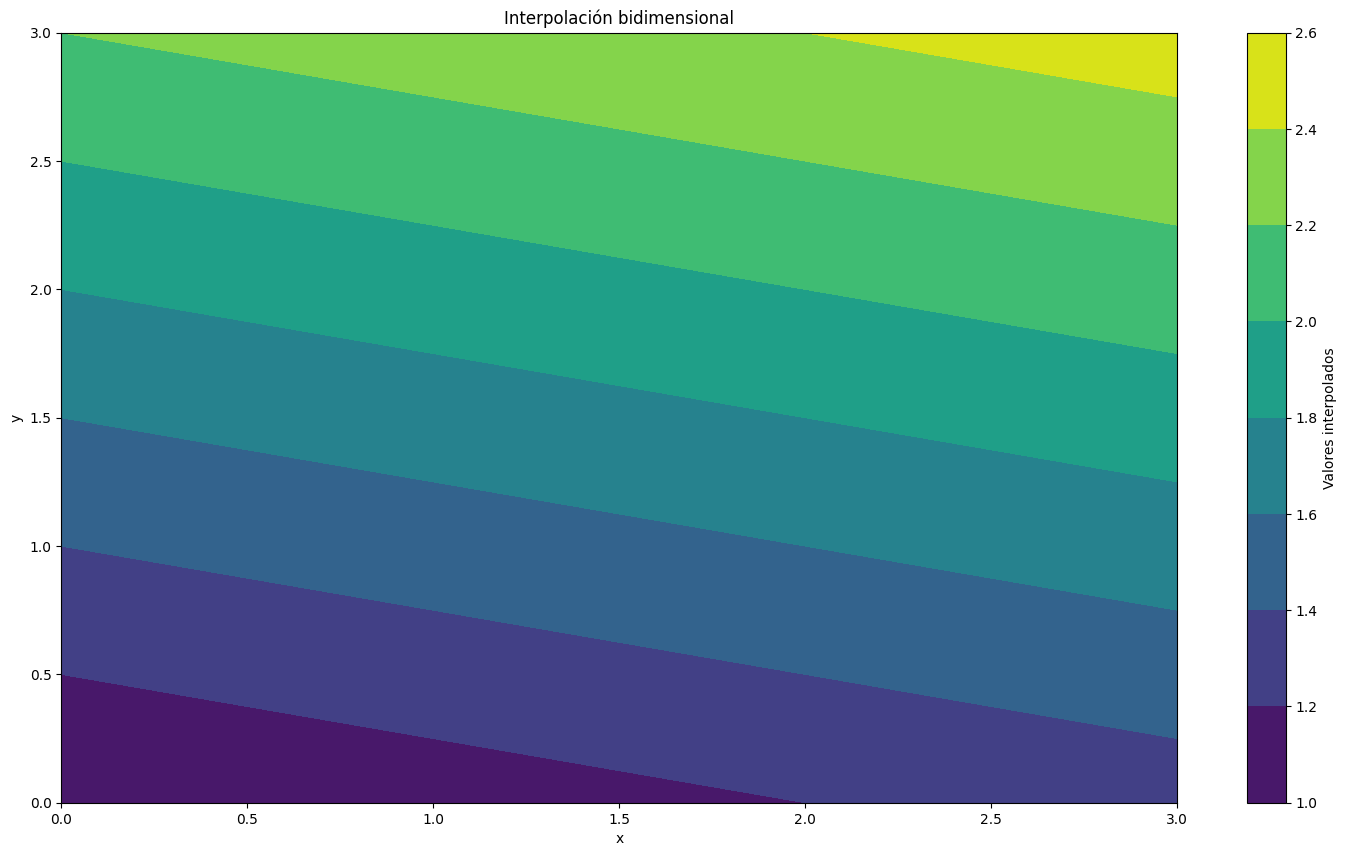

Tamaño del array interpolado: (30, 30)


In [153]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# Definir la matriz A
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

# Definir las coordenadas originales (índices de A)
x_original = np.linspace(0, 30, A.shape[1])  # Coordenadas x (0, 1, 2, 3)
y_original = np.linspace(0, 30, A.shape[0])  # Coordenadas y (0, 1, 2, 3)

# Crear la función de interpolación
interp_func = RegularGridInterpolator((y_original, x_original), A, method='linear')

# Crear la nueva grilla para interpolar
x_new = np.linspace(0, 3, 30)  # Grilla para x (30 puntos)
y_new = np.linspace(0, 3, 30)  # Grilla para y (30 puntos)
x_grid, y_grid = np.meshgrid(x_new, y_new)  # Crear una grilla 2D

# Evaluar la interpolación en la nueva grilla
points = np.array([y_grid.ravel(), x_grid.ravel()]).T  # Puntos (y, x) en 2D
A_interpolated = interp_func(points).reshape(30, 30)  # Interpolar y reestructurar

# Visualizar la interpolación
plt.figure(figsize=(18, 10))
plt.contourf(x_new, y_new, A_interpolated, cmap='viridis')
plt.colorbar(label='Valores interpolados')
plt.title('Interpolación bidimensional')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Verificar el tamaño del resultado
print("Tamaño del array interpolado:", A_interpolated.shape)  # (30, 30)


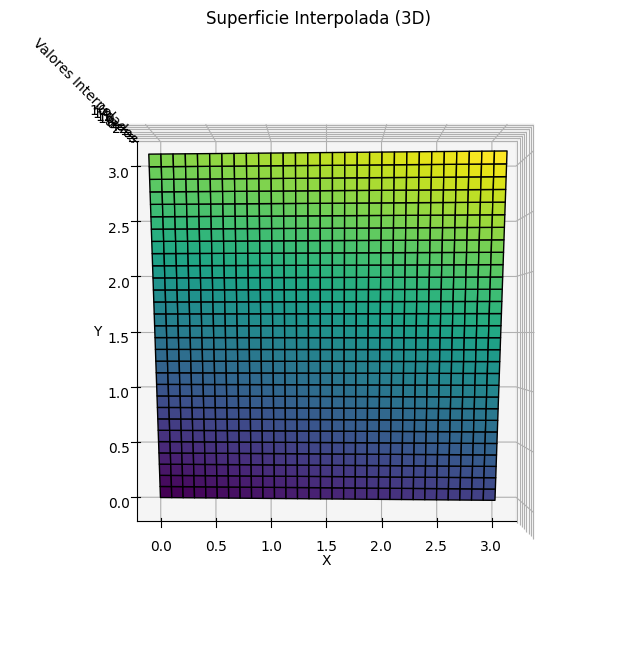

In [160]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la matriz A
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

# Definir las coordenadas originales (índices de A)
x_original = np.linspace(0, 3, A.shape[1])  # Coordenadas x (0, 1, 2, 3)
y_original = np.linspace(0, 3, A.shape[0])  # Coordenadas y (0, 1, 2, 3)

# Crear la función de interpolación
interp_func = RegularGridInterpolator((y_original, x_original), A, method='linear')

# Crear la nueva grilla para interpolar
x_new = np.linspace(0, 3, 30)  # Grilla para x (30 puntos)
y_new = np.linspace(0, 3, 30)  # Grilla para y (30 puntos)
x_grid, y_grid = np.meshgrid(x_new, y_new)  # Crear una grilla 2D

# Evaluar la interpolación en la nueva grilla
points = np.array([y_grid.ravel(), x_grid.ravel()]).T  # Puntos (y, x) en 2D
A_interpolated = interp_func(points).reshape(30, 30)  # Interpolar y reestructurar

# Crear la gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear la superficie
ax.plot_surface(x_grid, y_grid, A_interpolated, cmap='viridis', edgecolor='k')

# Personalizar la gráfica
ax.set_title('Superficie Interpolada (3D)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valores Interpolados')
ax.view_init(elev=90,azim=-90)
# Mostrar la gráfica
plt.show()
